**<h3 id="top"><center>WiDS Datathon 2024 Challenge #2</center></h3>**

### Table of content

- [Importing libraries and loading data](#import)
- **[Exploratory data analysis (EDA)](#eda)**
    - [Discovery phase](#eda-discovery)
        - [Data overview](#eda-discovery-overview)
        - [Geographical data overview](#eda-discovery-geo)
        - [Climate data overview](#eda-discovery-climate)
        - [Overview of socioeconomic and demographic data](#eda-discovery-socio)
        - [Breast cancer diagnosis types and codes](#eda-discovery-cancer)
        - **[Key takeaways from the discovery phase](#eda-discovery-takeaway)**
    - [Structuring and pre-cleaning phase](#eda-structuring)
        - [Data dictionary generation](#eda-structuring-dict)
        - [Visualisation of climate data](#eda-structuring-climate)
        - [Examination of socioeconomic and demographic data patterns](#eda-structuring-socio)
        - [Visualisation of individual patient's data](#eda-structuring-patient)
        - **[Key takeaways from the structuring phase](#eda-structuring-takeaway)**
    - [Cleaning phase](#eda-cleaning)
        - [Cleaning data strategy overview](#eda-cleaning-strategy)
        - [Resulting dataset validation](#eda-cleaning-validation)
        - [Attribute selection and final data transformation](#eda-cleaning-selection)
- **[Machine learning](#ml)**
    - [Construction phase](#ml-construction)
    - [Execution phase](#ml-execution)
    - [Submission](#ml-submission)

This Datathon used a real-world evidence dataset from Health Verity, one of the largest healthcare data ecosystems in the US.

**Task:** </br>
Predict the patient's Metastatic Diagnosis Period in the Test Dataset using the provided characteristics and information about the patient.

**Input data:** </br>
1) Training dataset `train.csv` where the observed values of the outcome [Metastatic Diagnosis Period] for each row is provided.
2) Test dataset `test.csv` where we withhold the observed values of the outcome for each row.
3) Example of a solution file prepared for submission in `solution_template.csv`.

**Additional facts about data:** </br>
— dataset contains health related information of patients who were diagnosed with *metastatic triple negative breast cancers* in US. </br>
— dataset was enriched with the US Zip Codes Database, </br>
— dataset was then further enriched with zip code level climate data. </br>

<details>
<summary>Open to see all collums.</summary>

**Target**
`metastatic_diagnosis_period`: This is the period (in days) in which metastatic cancer was diagnosed. Specifically, it is relative to the fact that breast cancer has already been diagnosed. Then the breast cancer is further diagnosed as having become metastatic cancer.

**Columns**
- `patient_id` - Unique identification number of patient
- `patient_race` - Asian, African American, Hispanic or Latino, White, Other Race
- `payer_type` - payer type at Medicaid, Commercial, Medicare on the metastatic date
- `patient_state` - Patient State (e.g. AL, AK, AZ, AR, CA, CO etc…) on the metastatic date
- `patient_zip3` - Patient Zip3 (e.g. 190) on the metastatic date
- `patient_age` - Derived from Patient Year of Birth (index year minus year of birth)
- `patient_gender` - F, M on the metastatic date
- `bmi` - If Available, will show available BMI information (Earliest BMI recording post metastatic date)
- `breast_cancer_diagnosis_code` - ICD10 or ICD9 diagnoses code
- `breast_cancer_diagnosis_desc` - ICD10 or ICD9 code description. This column is raw text and may require NLP/ processing and cleaning
- `metastatic_cancer_diagnosis_code` - ICD10 diagnoses code
- `metastatic_first_novel_treatment` - Generic drug name of the first novel treatment (e.g. "Cisplatin") after metastatic diagnosis
- `metastatic_first_novel_treatment_type` - Description of Treatment (e.g. Antineoplastic) of first novel treatment after metastatic diagnosis
- `region` - Region of patient location
- `division` - Division of patient location
- `population` - An estimate of the zip code's population.
- `density` - The estimated population per square kilometer.
- `age_median` - The median age of residents in the zip code.
- `male` - The percentage of residents who report being male (e.g. 55.1).
- `female` - The percentage of residents who report being female (e.g. 44.9).
- `married` - The percentage of residents who report being married (e.g. 44.9).
- `family_size` - The average size of resident families (e.g. 3.22).
- `income_household_median` - Median household income in USD.
- `income_household_six_figure` - Percentage of households that earn at least $100,000 (e.g. 25.3)
- `home_ownership` - Percentage of households that own (rather than rent) their residence.
- `housing_units` - The number of housing units (or households) in the zip code.
- `home_value` - The median value of homes that are owned by residents.
- `rent_median` - The median rent paid by renters.
- `education_college_or_above` - The percentage of residents with at least a 4-year degree.
- `labor_force_participation` - The percentage of residents 16 and older in the labor force.
- `unemployment_rate` - The percentage of residents unemployed.
- `race_white` - The percentage of residents who report their race White.
- `race_black` - The percentage of residents who report their race as Black or African American.
- `race_asian` - The percentage of residents who report their race as Asian.
- `race_native` - The percentage of residents who report their race as American Indian and Alaska Native.
- `race_pacific` - The percentage of residents who report their race as Native Hawaiian and Other Pacific Islander.
- `race_other` - The percentage of residents who report their race as Some other race.
- `race_multiple` - The percentage of residents who report their race as Two or more races.
- `hispanic` - The percentage of residents who report being Hispanic. Note: Hispanic is considered to be an ethnicity and not a race.
- `age_under_10` - The percentage of residents aged 0-9.
- `age_10_to_19` - The percentage of residents aged 10-19.
- `age_20s` - The percentage of residents aged 20-29.
- `age_30s` - The percentage of residents aged 30-39.
- `age_40s` - The percentage of residents aged 40-49.
- `age_50s` - The percentage of residents aged 50-59.
- `age_60s` - The percentage of residents aged 60-69.
- `age_70s` - The percentage of residents aged 70-79.
- `age_over_80` - The percentage of residents aged over 80.
- `divorced` - The percentage of residents divorced.
- `never_married` - The percentage of residents never married.
- `widowed` - The percentage of residents never widowed.
- `family_dual_income` - The percentage of families with dual income earners.
- `income_household_under_5` - The percentage of households with income under $5,000.
- `income_household_5_to_10` - The percentage of households with income from $5,000-$10,000.
- `income_household_10_to_15` - The percentage of households with income from $10,000-$15,000.
- `income_household_15_to_20` - The percentage of households with income from $15,000-$20,000.
- `income_household_20_to_25` - The percentage of households with income from $20,000-$25,000.
- `income_household_25_to_35` - The percentage of households with income from $25,000-$35,000.
- `income_household_35_to_50` - The percentage of households with income from $35,000-$50,000.
- `income_household_50_to_75` - The percentage of households with income from $50,000-$75,000.
- `income_household_75_to_100` - The percentage of households with income from $75,000-$100,000.
- `income_household_100_to_150` - The percentage of households with income from $100,000-$150,000.
- `income_household_150_over` - The percentage of households with income over $150,000.
- `income_individual_median` - The median income of individuals in the zip code.
- `poverty` - The median value of owner occupied homes.
- `rent_burden` - The median rent as a percentage of the median renter's household income.
- `education_less_highschool` - The percentage of residents with less than a high school education.
- `education_highschool` - The percentage of residents with a high school diploma but no more.
- `education_some_college` - The percentage of residents with some college but no more.
- `education_bachelors` - The percentage of residents with a bachelor's degree (or equivalent) but no more.
- `education_graduate` - The percentage of residents with a graduate degree.
- `education_stem_degree` - The percentage of college graduates with a Bachelor's degree or higher in a Science and Engineering (or related) field.
- `self_employed` - The percentage of households reporting self-employment income on their 2016 IRS tax return.
- `farmer` - The percentage of households reporting farm income on their 2016 IRS tax return.
- `disabled` - The percentage of residents who report a disability.
- `limited_english` - The percentage of residents who only speak limited English.
- `commute_time` - The median commute time of resident workers in minutes.
- `health_uninsured` - The percentage of residents who report not having health insurance.
- `veteran` - The percentage of residents who are veterans.
- `Average of Jan-13`…`Average of Dec-18` - 72 columns showing the zip 3 Monthly Average Temperature for the patient’s zip 3 and month referenced.

</details>

<h2 id="import">Importing libraries and loading data</h2>

Import and unzip datasets:  

```bash
!kaggle competitions download -c widsdatathon2024-challenge2
!unzip widsdatathon2024-challenge2.zip
```

More information about [Kaggle API](https://github.com/Kaggle/kaggle-api)

In [41]:
# Data manipulation
import pandas as pd
import numpy as np
import re
import datetime as dt

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Mathematical and statistical packages
from math import ceil
from scipy.stats import pearsonr, spearmanr, chi2_contingency
from scipy.stats import f_oneway, pointbiserialr

#Machine Learning Libraries
# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
# Clustering
from sklearn.cluster import KMeans
# Linear models
from sklearn.linear_model import Ridge
# Tree-based models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
# Neural Networks
from sklearn.neural_network import MLPRegressor
# Model performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score, f1_score


# modules and libraries for NLP processing the text data
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK data files for work with texts
nltk.download('punkt');
nltk.download('stopwords');
nltk.download('wordnet');

# Ignore specific FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set values of the display option
pd.set_option("display.max_columns", 155)
pd.set_option("display.max_rows", 155)
pd.set_option("display.max_colwidth", 200)

# Save files
import os
from joblib import dump, load

In [2]:
# Loading data sets into DataFrames
df_solution = pd.read_csv("solution_template.csv")
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

*[<p align="right">Back to top of page</p>](#top)*

<h2 id="eda">Exploratory data analysis (EDA)</h2>

<h3 id="eda-discovery">Discovery phase</h3>

*Check out the overall shape, size, datatypes, Nulls and content of the datasets.*

<h4 id="eda-discovery-overview">Data overview</h4>

In [3]:
dataset_dict = {
    "test dataset": df_test,
    "training dataset": df_train,
    "solution template": df_solution
}

for table_name in dataset_dict:
    print(f'\n\n\033[1m{table_name.upper()}\033[0m')
    row, col = dataset_dict[table_name].shape
    print(f'The {table_name} contains \033[1m{row}\033[0m rows and \033[1m{col}\033[0m columns.')
    print('The first three rows of the table:')
    display(dataset_dict[table_name].head(3))

    dataset_dict[table_name].columns = [i.lower().replace(" ", "_").replace("-", "_") for i in dataset_dict[table_name].columns]
    
    print('Missing values:')
    df_info = pd.DataFrame(index=dataset_dict[table_name].columns)
    df_info["null_percent"] = round(100.0 * dataset_dict[table_name].isnull().sum() / row, 2)
    df_info["null_cnt"] = dataset_dict[table_name].isnull().sum()
    display(df_info.query("null_cnt > 0").sort_values(by="null_percent", ascending=False).transpose())

    print('Summary information: ')
    display(dataset_dict[table_name].info())



TEST DATASET
The test dataset contains 5646 rows and 151 columns.
The first three rows of the table:


patient_id patient_race  payer_type patient_state  patient_zip3 Region  \
0      730681          NaN  COMMERCIAL            LA           713  South   
1      334212        Black         NaN            NC           283  South   
2      571362          NaN  COMMERCIAL            TX           794  South   

             Division  patient_age patient_gender    bmi  \
0  West South Central           55              F    NaN   
1      South Atlantic           60              F  40.00   
2  West South Central           54              F  32.33   

  breast_cancer_diagnosis_code  \
0                         1746   
1                       C50912   
2                         1742   

                                   breast_cancer_diagnosis_desc  \
0          Malignant neoplasm of axillary tail of female breast   
1  Malignant neoplasm of unspecified site of left female breast   
2   Malignant neoplasm of upper-inner quadrant of female breast   

  metastatic_cancer_diagnosis_code metastatic_first_novel_treatment  \
0                            C7981                              NaN   
1                             C773                              NaN   
2                             C773                              NaN   

  metastatic_first_novel_treatment_type  population  density  age_median  \
0                                   NaN     4639.07    72.66       41.50   
1                                   NaN    10875.30   217.91       39.64   
2                                   NaN    18716.73  1019.51       30.37   

   age_under_10  age_10_to_19  age_20s  age_30s  age_40s  age_50s  age_60s  \
0         11.40         13.44    11.42    11.45    12.56    13.08    14.26   
1         11.23         13.72    15.01    12.02    11.58    11.77    12.77   
2         11.00         18.86    23.11    12.24     9.88     9.12     8.38   

   age_70s  age_over_80   male  female  married  divorced  never_married  \
0     7.71         4.73  50.02   49.98    42.37     14.70          34.76   
1     8.52         3.41  51.33   48.67    44.14     13.28          34.62   
2     4.78         2.62  50.29   49.71    35.99     12.76          46.65   

   widowed  family_size  family_dual_income  income_household_median  \
0     8.18         3.30               38.83                 40643.61   
1     7.96         3.33               42.57                 49924.38   
2     4.63         3.15               54.23                 48238.92   

   income_household_under_5  income_household_5_to_10  \
0                      6.77                      5.02   
1                      4.59                      3.83   
2                      6.12                      4.73   

   income_household_10_to_15  income_household_15_to_20  \
0                       9.93                       7.53   
1                       6.58                       5.27   
2                       6.70                       4.86   

   income_household_20_to_25  income_household_25_to_35  \
0                       6.36                      11.54   
1                       5.90                      13.16   
2                       6.21                      11.19   

   income_household_35_to_50  income_household_50_to_75  \
0                      12.60                      12.70   
1                      13.99                      18.14   
2                      13.28                      16.98   

   income_household_75_to_100  income_household_100_to_150  \
0                       11.60                         9.53   
1                       10.65                        11.39   
2                       10.42                        11.80   

   income_household_150_over  income_household_six_figure  \
0                       6.43                        15.97   
1                       6.49                        17.88   
2                       7.68                        19.48   

   income_individual_median  home_ownership  housing_units  home_value  \
0                  22663.32           74.7

Missing values:


metastatic_first_novel_treatment  \
null_percent                             99.88   
null_cnt                               5639.00   

              metastatic_first_novel_treatment_type     bmi  patient_race  \
null_percent                                  99.88    69.8         49.33   
null_cnt                                    5639.00  3941.0       2785.00   

              payer_type  average_of_apr_14  average_of_jun_14  \
null_percent        13.9               1.68                1.4   
null_cnt           785.0              95.00               79.0   

              average_of_oct_13  average_of_dec_18  average_of_mar_14  \
null_percent               0.48               0.41                0.3   
null_cnt                  27.00              23.00               17.0   

              average_of_jul_18  average_of_oct_17  average_of_aug_15  \
null_percent               0.28               0.27               0.27   
null_cnt                  16.00              15.00              15.00   

              average_of_sep_13  average_of_jul_17  average_of_apr_15  \
null_percent               0.25               0.23               0.18   
null_cnt                  14.00              13.00              10.00   

              average_of_nov_14  average_of_jan_13  average_of_nov_18  \
null_percent               0.16               0.16               0.14   
null_cnt                   9.00               9.00               8.00   

              average_of_jun_13  average_of_aug_18  average_of_mar_18  \
null_percent               0.12               0.12               0.12   
null_cnt                   7.00               7.00               7.00   

              average_of_feb_15  average_of_mar_15  average_of_feb_14  \
null_percent               0.11               0.11               0.11   
null_cnt                   6.00               6.00               6.00   

              average_of_feb_18  average_of_nov_17  average_of_aug_13  \
null_percent               0.11               0.11               0.09   
null_cnt                   6.00               6.00               5.00   

              average_of_dec_15  average_of_jun_18  average_of_may_16  \
null_percent               0.09               0.09               0.07   
null_cnt                   5.00               5.00               4.00   

              average_of_jul_16  average_of_feb_16  average_of_jan_16  \
null_percent               0.07               0.07               0.07   
null_cnt                   4.00               4.00               4.00   

              average_of_oct_15  average_of_nov_15  average_of_jan_17  \
null_percent               0.07               0.07               0.05   
null_cnt                   4.00               4.00               3.00   

              average_of_jan_14  average_of_jan_15  average_of_sep_17  \
null_percent               0.05               0.05               0.04   
null_cnt                   3.00               3.00               2.00   

              average_of_dec_16  average_of_sep_18  average_of_oct_18  \
null_percent               0.04               0.04               0.04   
null_cnt                   2.00               2.00               2.00   

              average_of_jun_17  
null_percent               0.02  
null_cnt                   1.00

Summary information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5646 entries, 0 to 5645
Columns: 151 entries, patient_id to average_of_dec_18
dtypes: float64(137), int64(3), object(11)
memory usage: 6.5+ MB


None



TRAINING DATASET
The training dataset contains 13173 rows and 152 columns.
The first three rows of the table:


patient_id patient_race  payer_type patient_state  patient_zip3   Region  \
0      268700          NaN  COMMERCIAL            AR           724    South   
1      484983        White         NaN            IL           629  Midwest   
2      277055          NaN  COMMERCIAL            CA           925     West   

             Division  patient_age patient_gender    bmi  \
0  West South Central           39              F    NaN   
1  East North Central           55              F  35.36   
2             Pacific           59              F    NaN   

  breast_cancer_diagnosis_code  \
0                       C50912   
1                       C50412   
2                         1749   

                                   breast_cancer_diagnosis_desc  \
0  Malignant neoplasm of unspecified site of left female breast   
1  Malig neoplasm of upper-outer quadrant of left female breast   
2            Malignant neoplasm of breast (female), unspecified   

  metastatic_cancer_diagnosis_code metastatic_first_novel_treatment  \
0                             C773                              NaN   
1                             C773                              NaN   
2                             C773                              NaN   

  metastatic_first_novel_treatment_type  population  density  age_median  \
0                                   NaN     3924.87    82.63       42.58   
1                                   NaN     2745.39    51.79       43.54   
2                                   NaN    38343.18   700.34       36.28   

   age_under_10  age_10_to_19  age_20s  age_30s  age_40s  age_50s  age_60s  \
0         11.61         13.03    10.87    11.80    12.29    13.22    13.47   
1         11.22         12.19    11.45    11.01    11.35    14.39    14.15   
2         13.27         15.66    13.49    13.45    12.40    11.58    10.47   

   age_70s  age_over_80   male  female  married  divorced  never_married  \
0    10.07         3.64  51.43   48.57    51.05     16.72          23.57   
1     9.17         5.05  49.32   50.68    49.48     15.42          26.93   
2     6.38         3.28  49.99   50.01    48.81     11.90          34.35   

   widowed  family_size  family_dual_income  income_household_median  \
0     8.66         3.01               43.99                 44483.35   
1     8.17         3.17               41.41                 51796.79   
2     4.95         3.80               52.89                 78696.87   

   income_household_under_5  income_household_5_to_10  \
0                      2.21                      3.97   
1                      3.67                      3.86   
2                      2.59                      1.81   

   income_household_10_to_15  income_household_15_to_20  \
0                       8.52                       7.08   
1                       6.58                       5.58   
2                       3.16                       3.71   

   income_household_20_to_25  income_household_25_to_35  \
0                       7.67                      13.82   
1                       5.38                      11.02   
2                       3.23                       7.40   

   income_household_35_to_50  income_household_50_to_75  \
0                      15.14                      17.51   
1                      13.09                      19.56   
2                      10.42                      16.83   

   income_household_75_to_100  income_household_100_to_150  \
0                       11.26                         8.90   
1                       11.76                        11.40   
2                       13.45                        19.21   

   income_household_150_over  income_household_six_figure  \
0                       3.93                        12.83   
1                       8.11                        19.51   
2                      18.23                        37.44   

   income_individual_median  home_ownership  housing_units  home_value  \
0                  24048.55       

Missing values:


metastatic_first_novel_treatment  \
null_percent                             99.92   
null_cnt                              13162.00   

              metastatic_first_novel_treatment_type      bmi  patient_race  \
null_percent                                  99.92    68.86         50.54   
null_cnt                                   13162.00  9071.00       6657.00   

              payer_type  average_of_apr_14  average_of_jun_14  \
null_percent        13.4               1.37               1.15   
null_cnt          1765.0             180.00             152.00   

              average_of_oct_13  average_of_jul_18  average_of_jan_13  \
null_percent               0.45               0.35               0.25   
null_cnt                  59.00              46.00              33.00   

              average_of_dec_18  average_of_jul_17  average_of_mar_14  \
null_percent               0.25               0.24               0.22   
null_cnt                  33.00              31.00              29.00   

              average_of_apr_15  average_of_sep_13  average_of_nov_14  \
null_percent               0.21                0.2               0.18   
null_cnt                  28.00               27.0              24.00   

              average_of_aug_15  average_of_oct_17  average_of_jun_13  \
null_percent               0.17               0.16               0.15   
null_cnt                  22.00              21.00              20.00   

              average_of_may_16  average_of_dec_15  average_of_aug_13  \
null_percent               0.14               0.14               0.13   
null_cnt                  19.00              18.00              17.00   

              average_of_jul_16  average_of_jan_16  average_of_feb_16  \
null_percent               0.12               0.12               0.12   
null_cnt                  16.00              16.00              16.00   

              average_of_nov_15  average_of_oct_15  average_of_aug_18  \
null_percent               0.12               0.12               0.12   
null_cnt                  16.00              16.00              16.00   

              average_of_dec_16  average_of_feb_15  average_of_mar_15  \
null_percent                0.1               0.09               0.09   
null_cnt                   13.0              12.00              12.00   

              average_of_nov_18  average_of_sep_17  average_of_jan_17  \
null_percent               0.09               0.08               0.07   
null_cnt                  12.00              10.00               9.00   

              average_of_feb_14  average_of_jun_18  average_of_jan_15  \
null_percent               0.07               0.07               0.05   
null_cnt                   9.00               9.00               6.00   

              average_of_mar_18  average_of_sep_18  average_of_oct_18  \
null_percent               0.05               0.05               0.05   
null_cnt                   6.00               7.00               7.00   

              average_of_nov_17  average_of_feb_18  family_size  \
null_percent               0.04               0.04         0.04   
null_cnt                   5.00               5.00         5.00   

              income_household_15_to_20  family_dual_income  \
null_percent                       0.04                0.04   
null_cnt                           5.00                5.00   

              income_household_20_to_25  poverty  income_household_six_figure  \
null_percent                       0.04     0.04                         0.04   
null_cnt                           5.00     5.00                         5.00   

              home_ownership  home_value  rent_median  rent_burden  \
null_percent            0.04        0.04         0.04         0.04   
null_cnt                5.00        5.00         5.00         5.00   

              self_employed  income_household_median  farmer  \
null_percent           0.04                     0.04    0.04   
null_cnt               5.00       

Summary information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13173 entries, 0 to 13172
Columns: 152 entries, patient_id to metastatic_diagnosis_period
dtypes: float64(137), int64(4), object(11)
memory usage: 15.3+ MB


None



SOLUTION TEMPLATE
The solution template contains 5646 rows and 2 columns.
The first three rows of the table:


patient_id  metastatic_diagnosis_period
0      730681                          100
1      334212                            0
2      571362                          100

Missing values:


Empty DataFrame
Columns: []
Index: [null_percent, null_cnt]

Summary information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5646 entries, 0 to 5645
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   patient_id                   5646 non-null   int64
 1   metastatic_diagnosis_period  5646 non-null   int64
dtypes: int64(2)
memory usage: 88.3 KB


None

In [4]:
duplicated_id = df_test["patient_id"].isin(df_train["patient_id"])
num_duplicated_id = duplicated_id.sum()
print(f"The number of duplicate patient_id for the test and training datasets: {num_duplicated_id}")

The number of duplicate patient_id for the test and training datasets: 0


*[<p align="right">Back to top of page</p>](#top)*

<h4 id="eda-discovery-geo">Geographical data overview</h4>

To ensure that zip code and region data is consistent and accurate, especially after adding regional demographic and climate information, it's important **to check that the geographic details are the same in both the test and train datasets**.

In [5]:
# Combine, deduplicate and reset the indexes for the test and train data
mask = ["patient_state", "patient_zip3", "region", "division", "population", "average_of_jan_18", "average_of_jun_15"]

zip_info = (
    pd.concat([df_test[mask], df_train[mask]])
    .drop_duplicates(ignore_index=True)
    .reset_index(drop=True)
)

display(zip_info.info())

print("List of states, regions, and divisions:")
display(zip_info[["patient_state", "region", "division"]].drop_duplicates().sort_values("patient_state"))

# Identify inconsistent zip codes
zip_bug = (
    zip_info[["patient_state", "patient_zip3", "region", "division"]]
    .groupby("patient_zip3")
    .nunique()
    .query("patient_state > 1 or region > 1 or division > 1")
    .reset_index()
)

print("Inconsistent Zip Codes:")
display(zip_bug)

# Display some metrics for those zip codes and states to identify the problem
zip_list = [864, 630]
state_list = ["MO", "IL", "AZ", "CA"]

print("Metrics to check for an inconsistent pair of zip and state:")
display(
    zip_info
    .query("patient_zip3 in @zip_list")
    .drop_duplicates()
)

print("Median values for the states:")
display(
    zip_info[["patient_state", "population", "average_of_jan_18", "average_of_jun_15"]]
    .query("patient_state in @state_list")
    .groupby("patient_state")
    .median()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_state      768 non-null    object 
 1   patient_zip3       768 non-null    int64  
 2   region             768 non-null    object 
 3   division           768 non-null    object 
 4   population         768 non-null    float64
 5   average_of_jan_18  768 non-null    float64
 6   average_of_jun_15  768 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 42.1+ KB


None

List of states, regions, and divisions:


patient_state     region            division
654            AK       West             Pacific
264            AL      South  East South Central
160            AR      South  West South Central
37             AZ       West            Mountain
750            CA       West            Mountain
5              CA       West             Pacific
27             CO       West            Mountain
248            DC      South      South Atlantic
11             DE      South      South Atlantic
7              FL      South      South Atlantic
25             GA      South      South Atlantic
276            HI       West             Pacific
116            IA    Midwest  West North Central
15             ID       West            Mountain
21             IL    Midwest  East North Central
18             IN    Midwest  East North Central
54             KS    Midwest  West North Central
38             KY      South  East South Central
0              LA      South  West South Central
109            MD      South      South Atlantic
6              MI    Midwest  East North Central
16             MN    Midwest  West North Central
122            MO    Midwest  West North Central
60             MS      South  East South Central
13             MT       West            Mountain
1              NC      South      South Atlantic
595            ND    Midwest  West North Central
336            NE    Midwest  West North Central
42             NM       West            Mountain
246            NV       West            Mountain
19             NY  Northeast     Middle Atlantic
12             OH    Midwest  East North Central
35             OK      South  West South Central
252            OR       West             Pacific
9              PA  Northeast     Middle Atlantic
96             SC      South      South Atlantic
557            SD    Midwest  West North Central
3              TN      South  East South Central
2              TX      South  West South Central
186            UT       West            Mountain
64             VA      South      South Atlantic
4              WA       West             Pacific
72             WI    Midwest  East North Central
142            WV      South      South Atlantic
527            WY       West            Mountain

Inconsistent Zip Codes:


patient_zip3  patient_state  region  division
0           630              2       1         2
1           864              2       1         1

Metrics to check for an inconsistent pair of zip and state:


patient_state  patient_zip3   region            division  population  \
236            MO           630  Midwest  West North Central    12912.19   
438            AZ           864     West            Mountain     8967.22   
709            IL           630  Midwest  East North Central    12912.19   
750            CA           864     West            Mountain     8967.22   

     average_of_jan_18  average_of_jun_15  
236              27.53              73.72  
438              56.96              92.34  
709              27.53              73.72  
750              56.96              92.34

Median values for the states:


population  average_of_jan_18  average_of_jun_15
patient_state                                                  
AZ               9277.240             53.360             81.870
CA              26093.925             55.820             70.010
IL               4894.605             23.735             70.375
MO               3937.410             27.980             74.140

Looks like a problem not in the zip codes, but the `patient_state` and `division` columns were applied incorrectly.

In [6]:
# Create a list of relevant columns for weather data
WEATHER_COL = [i for i in df_train.columns if re.match(r"^average_of|patient_z", i) is not None]

# Combine weather data from test and train datasets, remove duplicates, and reset index
weather_dt = (
    pd.concat([df_test[WEATHER_COL], df_train[WEATHER_COL]])
    .drop_duplicates(ignore_index=True)
    .reset_index(drop=True)
)

# Create a mask for missing values
mask = weather_dt.isna()
zip_weather_null = weather_dt.loc[mask.any(axis=1), "patient_zip3"]

# Print the number and percentage of zip codes with missing climate data
print(
    "Zip codes with missing climate data: {} ({}%)"
    .format(
        len(zip_weather_null), 
        round(100 * len(zip_weather_null) / len(df_test["patient_zip3"]), 2)
    )
)

# Print the percentage of missing climate data in the training dataset
print(
    "Percentage of missing climate data in the training dataset: {}%"
    .format(round(len(df_train.query("patient_zip3 in @zip_weather_null")) / len(df_train["patient_zip3"]) * 100, 2))
)

# Print the percentage of missing climate data in the test dataset
print(
    "Percentage of missing climate data in the test dataset: {}%"
    .format(round(len(df_test.query("patient_zip3 in @zip_weather_null")) / len(df_test["patient_zip3"]) * 100, 2))
)


Zip codes with missing climate data: 29 (0.51%)
Percentage of missing climate data in the training dataset: 3.08%
Percentage of missing climate data in the test dataset: 3.45%


*[<p align="right">Back to top of page</p>](#top)*

<h4 id="eda-discovery-socio">Overview of socioeconomic and demographic data</h4>

In [7]:
# Define columns to include based on the regular expression
exp = r"^((?!patient|payer|bmi|breast|meta|region|division|average)|patient_z)"
SOCIAL_COL = [i for i in df_train.columns if re.match(exp, i) is not None]

# Combine social data from test and train datasets, remove duplicates, and reset index
social_dt = (
    pd.concat([df_test[SOCIAL_COL], df_train[SOCIAL_COL]])
    .drop_duplicates(ignore_index=True)
    .reset_index(drop=True)
)

# Print general information about zip codes
print("General information:")
print(
    "Unique amount of zip codes: {} ({} total rows)."
    .format(
        pd.concat([df_test, df_train])["patient_zip3"].nunique(),
        len(social_dt["patient_zip3"])
    )
)

# Identify zip codes with inconsistent information
social_zip_bug = (
    social_dt
    .groupby(["patient_zip3"], as_index=False)
    .count()
    .query('population > 1')['patient_zip3']
    .to_list()
)
print(f"\nZip codes with inconsistent information: \n{social_zip_bug}")

# Display metrics to look for a possible problem
print("\nMetrics to look for a possible problem: ")
population_list = social_dt.query("patient_zip3 in @social_zip_bug")["population"].to_list()
display(social_dt.query("population in @population_list").sort_values(["patient_zip3"]))

# Calculate and print percentage of inconsistent social data in the training dataset
print(
    "Percentage of inconsistent social data in the training dataset: {}%"
    .format(round(len(df_train.query("patient_zip3 in @social_zip_bug")) / len(df_train["patient_zip3"]) * 100, 2))
)

# Calculate and print percentage of inconsistent social data in the test dataset
print(
    "Percentage of inconsistent social data in the test dataset: {}%"
    .format(round(len(df_test.query("patient_zip3 in @social_zip_bug")) / len(df_test["patient_zip3"]) * 100, 2))
)

General information:
Unique amount of zip codes: 763 (766 total rows).

Zip codes with inconsistent information: 
[395, 968, 988]

Metrics to look for a possible problem: 


patient_zip3  population  density  age_median  age_under_10  \
298           394    10492.25    90.65       39.06         12.29   
433           395    14629.18   275.45       38.94         10.93   
712           395    10492.25    90.65       39.06         12.29   
536           968    21581.45  2693.96       36.28          6.11   
700           968    13697.21   475.67       43.13         10.43   
351           970    13697.21   475.67       43.13         10.43   
521           986    11511.37   282.92       46.43          9.92   
328           988     5322.18    22.96       44.75         10.57   
755           988    11511.37   282.92       46.43          9.92   

     age_10_to_19  age_20s  age_30s  age_40s  age_50s  age_60s  age_70s  \
298         14.07    14.18    11.76    11.30    12.18    12.72     7.69   
433         13.81    15.54    12.69    11.60    12.71    11.51     7.94   
712         14.07    14.18    11.76    11.30    12.18    12.72     7.69   
536         10.99    36.90    10.54     8.52     8.75     8.44     5.56   
700         12.62    10.47    13.35    11.47    14.15    13.95     9.32   
351         12.62    10.47    13.35    11.47    14.15    13.95     9.32   
521         10.45    10.23    11.84    11.19    14.09    17.29    10.17   
328         13.01    10.87    10.51    11.90    13.02    16.85     9.35   
755         10.45    10.23    11.84    11.19    14.09    17.29    10.17   

     age_over_80   male  female  married  divorced  never_married  widowed  \
298         3.83  48.95   51.05    48.77     13.15          30.01     8.09   
433         3.23  52.56   47.44    44.20     15.83          33.72     6.25   
712         3.83  48.95   51.05    48.77     13.15          30.01     8.09   
536         4.16  61.60   38.40    33.07      7.68          54.98     4.28   
700         4.25  51.12   48.88    52.68     15.63          26.99     4.70   
351         4.25  51.12   48.88    52.68     15.63          26.99     4.70   
521         4.83  50.19   49.82    55.76     14.39          23.02     6.82   
328         3.90  49.99   50.01    54.37     15.16          25.44     5.03   
755         4.83  50.19   49.82    55.76     14.39          23.02     6.82   

     family_size  family_dual_income  income_household_median  \
298         3.28               42.89                 47510.59   
433         3.13               45.52                 52793.96   
712         3.28               42.89                 47510.59   
536         3.24               58.06                 89923.64   
700         3.06               51.96                 77232.94   
351         3.06               51.96                 77232.94   
521         2.91               45.74                 71508.87   
328         3.02               48.72                 60952.27   
755         2.91               45.74                 71508.87   

     income_household_under_5  income_household_5_to_10  \
298                      3.79                      4.57   
433                      4.37                      3.24   
712                      3.79                      4.57   
536                      3.16                      2.27   
700                      2.12                      1.53   
351                      2.12                      1.53   
521                      2.74                      1.83   
328                      1.83                      2.52   
755                      2.74                      1.83   

     income_household_10_to_15  income_household_15_to_20  \
298                       6.86                       6.27   
433                       4.94                       5.92   
712                       6.86                       6.27   
536                       2.60                       2.55   
700                       2.92                       2.98   
351                       2.92                       2.98   
521                       4.45                       3.28   
328                       4.00                       3.41   
7

Percentage of inconsistent social data in the training dataset: 0.23%
Percentage of inconsistent social data in the test dataset: 0.19%


*It looks as if some of the data has been taken from neighbouring postcodes (394, 970, 986).*

In [8]:
# Create a mask for missing values
mask = social_dt.isna()
zip_social_null = social_dt.loc[mask.any(axis=1), "patient_zip3"].to_list()

# Print zip codes with missing social data
print(f"Zip codes with missing social data: \n{zip_social_null}\n")

# Calculate and print the amount and percentage of missing social data in the training dataset
print(
    "Amount of missing social data in the training dataset: {} ({}%)"
    .format(
        len(df_train.query("patient_zip3 in @zip_social_null")),
        round(len(df_train.query("patient_zip3 in @zip_social_null")) / len(df_train["patient_zip3"]) * 100, 2)
    )
)

# Calculate and print the amount and percentage of missing social data in the test dataset
print(
    "Amount of missing social data in the test dataset: {} ({}%)"
    .format(
        len(df_test.query("patient_zip3 in @zip_social_null")),
        round(len(df_test.query("patient_zip3 in @zip_social_null")) / len(df_test["patient_zip3"]) * 100, 2)
    )
)

Zip codes with missing social data: 
[772]

Amount of missing social data in the training dataset: 5 (0.04%)
Amount of missing social data in the test dataset: 0 (0.0%)


*[<p align="right">Back to top of page</p>](#top)*

<h4 id="eda-discovery-cancer">Breast cancer diagnosis types and codes</h4>

In [9]:
# Define columns to be used
col = ["breast_cancer_diagnosis_code", "breast_cancer_diagnosis_desc"]

# Create a dictionary with all unique types of diagnoses
breast_cancer_diagnosis = (
    pd.concat([df_test[col], df_train[col]])
    .drop_duplicates()
    .reset_index(drop=True)
)

# Function to clean text using NLP techniques
def clean_str(text):
    # Normalize the text and remove punctuation
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [w for w in tokens if w not in stopwords.words('english')]
    # Lemmatize tokens to ensure consistency
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    # Save information in string format
    text = ' '.join(tokens)
    text = text.replace("malignant", "malig")
    text = text.replace("neoplasm", "neoplm")
    return text

# Function to determine gender from diagnosis description
def diagnosis_gender(text):
    if 'female' in text:
        return 'F'
    elif 'male' in text:
        return 'M'
    else:
        return 'unspecified'

# Apply cleaning and gender determination functions to the dataset
breast_cancer_diagnosis["breast_cancer_diagnosis_desc_cleaned"] = breast_cancer_diagnosis["breast_cancer_diagnosis_desc"].apply(clean_str)
breast_cancer_diagnosis["gender"] = breast_cancer_diagnosis["breast_cancer_diagnosis_desc_cleaned"].apply(diagnosis_gender)

# Display the amount of unique values in each column
print("Amount of unique values:")
display(breast_cancer_diagnosis.nunique())

# Check for unexpected breast cancer diagnosis codes in test and train datasets
print("Unexpected Breast Cancer Diagnosis codes:")
display(breast_cancer_diagnosis.query('gender != "F"'))

# Identify incorrect diagnosis codes
wrong_codes = breast_cancer_diagnosis.query('gender != "F"')["breast_cancer_diagnosis_code"].to_list()
test_wrong_code_df = df_test.query('breast_cancer_diagnosis_code in @wrong_codes')
train_wrong_code_df = df_train.query('breast_cancer_diagnosis_code in @wrong_codes')

# Display the amount and percentage of patients with unexpected diagnosis codes in the training dataset
print(
    "Amount of patients in training dataset with unexpected Breast Cancer Diagnosis code: {} ({:.3f}%)"
    .format(len(train_wrong_code_df["patient_id"]), len(train_wrong_code_df["patient_id"]) / len(df_train["patient_id"]) * 100)
)
display(train_wrong_code_df.sort_values(["breast_cancer_diagnosis_code"]))

# Display the amount and percentage of patients with unexpected diagnosis codes in the testing dataset
print(
    "Amount of patients in testing dataset with unexpected Breast Cancer Diagnosis code: {} ({:.3f}%)"
    .format(len(test_wrong_code_df["patient_id"]), len(test_wrong_code_df["patient_id"]) / len(df_test["patient_id"]) * 100)
)
display(test_wrong_code_df.sort_values(["breast_cancer_diagnosis_code"]))


Amount of unique values:


breast_cancer_diagnosis_code            48
breast_cancer_diagnosis_desc            48
breast_cancer_diagnosis_desc_cleaned    48
gender                                   3
dtype: int64

Unexpected Breast Cancer Diagnosis codes:


breast_cancer_diagnosis_code  \
11                        19881   
41                       C50421   
42                       C50922   
44                       C50221   
45                         C509   
46                       C50122   

                                   breast_cancer_diagnosis_desc  \
11                       Secondary malignant neoplasm of breast   
41  Malig neoplasm of upper-outer quadrant of right male breast   
42   Malignant neoplasm of unspecified site of left male breast   
44  Malig neoplasm of upper-inner quadrant of right male breast   
45             Malignant neoplasm of breast of unspecified site   
46    Malignant neoplasm of central portion of left male breast   

                  breast_cancer_diagnosis_desc_cleaned       gender  
11                       secondary malig neoplm breast  unspecified  
41  malig neoplm upperouter quadrant right male breast            M  
42      malig neoplm unspecified site left male breast            M  
44  malig neoplm upperinner quadrant right male breast            M  
45                malig neoplm breast unspecified site  unspecified  
46       malig neoplm central portion left male breast            M

Amount of patients in training dataset with unexpected Breast Cancer Diagnosis code: 20 (0.152%)


patient_id patient_race          payer_type patient_state  \
148        591124        White            MEDICAID            FL   
347        973960        White            MEDICAID            GA   
1057       537689        White  MEDICARE ADVANTAGE            FL   
1784       323996          NaN          COMMERCIAL            CA   
1803       736575          NaN            MEDICAID            CA   
11073      171323          NaN            MEDICAID            CA   
2281       694500          NaN  MEDICARE ADVANTAGE            NY   
11373      943003     Hispanic            MEDICAID            AZ   
3494       594180          NaN          COMMERCIAL            TX   
3824       994669          NaN            MEDICAID            GA   
4630       628621          NaN          COMMERCIAL            MO   
6578       404019        Black  MEDICARE ADVANTAGE            CA   
6184       222796        White            MEDICAID            CA   
3008       119773          NaN                 NaN            CA   
712        133511          NaN          COMMERCIAL            PA   
7440       724607          NaN          COMMERCIAL            NY   
3424       534306          NaN          COMMERCIAL            NY   
5359       670283        White          COMMERCIAL            CA   
12812      466431          NaN          COMMERCIAL            NY   
1908       141903        Other            MEDICAID            FL   

       patient_zip3     region            division  patient_age  \
148             339      South      South Atlantic           67   
347             317      South      South Atlantic           62   
1057            329      South      South Atlantic           66   
1784            908       West             Pacific           73   
1803            900       West             Pacific           82   
11073           928       West             Pacific           82   
2281            100  Northeast     Middle Atlantic           82   
11373           856       West            Mountain           58   
3494            778      South  West South Central           82   
3824            317      South      South Atlantic           53   
4630            631    Midwest  West North Central           68   
6578            900       West             Pacific           68   
6184            913       West             Pacific           49   
3008            900       West             Pacific           53   
712             173  Northeast     Middle Atlantic           45   
7440            104  Northeast     Middle Atlantic           48   
3424            100  Northeast     Middle Atlantic           61   
5359            945       West             Pacific           48   
12812           105  Northeast     Middle Atlantic           57   
1908            330      South      South Atlantic           66   

      patient_gender    bmi breast_cancer_diagnosis_code  \
148                F    NaN                        19881   
347                F    NaN                        19881   
1057               F    NaN                        19881   
1784               F    NaN                        19881   
1803               F  31.00                        19881   
11073              F    NaN                        19881   
2281               F    NaN                        19881   
11373              F  23.63                        19881   
3494               F  31.62                        19881   
3824               F    NaN                        19881   
4630               F    NaN                        19881   
6578               F    NaN                        19881   
6184               F    NaN                       C50122   
3008               F    NaN                       C50221   
712                F    NaN                       C50421   
7440               F    NaN                         C509   
3424               F    NaN                         C509   
5359               F    NaN                         C509   
12812              F    NaN   

Amount of patients in testing dataset with unexpected Breast Cancer Diagnosis code: 7 (0.124%)


patient_id patient_race          payer_type patient_state  patient_zip3  \
12        832804        White  MEDICARE ADVANTAGE            OH           442   
87        544670          NaN  MEDICARE ADVANTAGE            MN           551   
92        958647        Black            MEDICAID            PA           180   
3084      891357        Other          COMMERCIAL            CA           925   
3318      234959        White            MEDICAID            IL           604   
4343      388935        White          COMMERCIAL            MI           482   
4988      299224        Black  MEDICARE ADVANTAGE            CA           946   

         region            division  patient_age patient_gender    bmi  \
12      Midwest  East North Central           82              F    NaN   
87      Midwest  West North Central           65              F  35.48   
92    Northeast     Middle Atlantic           56              F  28.90   
3084       West             Pacific           62              F    NaN   
3318    Midwest  East North Central           67              F  26.04   
4343    Midwest  East North Central           46              F    NaN   
4988       West             Pacific           76              F  26.97   

     breast_cancer_diagnosis_code            breast_cancer_diagnosis_desc  \
12                          19881  Secondary malignant neoplasm of breast   
87                          19881  Secondary malignant neoplasm of breast   
92                          19881  Secondary malignant neoplasm of breast   
3084                        19881  Secondary malignant neoplasm of breast   
3318                        19881  Secondary malignant neoplasm of breast   
4343                        19881  Secondary malignant neoplasm of breast   
4988                        19881  Secondary malignant neoplasm of breast   

     metastatic_cancer_diagnosis_code metastatic_first_novel_treatment  \
12                              C7951                              NaN   
87                              C7981                              NaN   
92                              C7951                              NaN   
3084                             C786                              NaN   
3318                            C7981                              NaN   
4343                            C7981                              NaN   
4988                            C7981                              NaN   

     metastatic_first_novel_treatment_type  population  density  age_median  \
12                                     NaN    13035.00   355.70       42.89   
87                                     NaN    25588.25  1359.15       38.29   
92                                     NaN    10226.53   452.83       43.55   
3084                                   NaN    38343.18   700.34       36.28   
3318                                   NaN    18355.10   901.20       39.77   
4343                                   NaN    22080.59  1666.52       36.59   
4988                                   NaN    30600.00  3807.06       36.28   

      age_under_10  age_10_to_19  age_20s  age_30s  age_40s  age_50s  age_60s  \
12           10.60         14.09    11.44    11.42    11.43    14.90    13.55   
87           11.99         12.06    14.19    14.52    11.20    13.42    13.36   
92            9.94         13.41    10.48    10.89    14.10    14.54    13.62   
3084         13.27         15.66    13.49    13.45    12.40    11.58    10.47   
3318         11.67         14.25    12.34    12.34    12.92    13.67    12.40   
4343         12.78         12.86    15.81    13.20    11.89    12.46    11.60   
4988          9.95         13.17    16.11    18.63    13.12    10.87     9.47   

      age_70s  age_over_80   male  female  married  divorced  never_married  \
12       8.58         4.00  49.93   50.07    54.13     12.06          27.85   
87       6.01         3.25  50.57   49.43    45.30     11.19          39.23   
92       8.84         4.16  49.60  

*[<p align="right">Back to top of page</p>](#top)*

<h4 id="eda-discovery-takeaway">Key takeaways from the discovery phase</h4>

**Datasets have three types of features:**
1. Personal information about the patient: `patient_id`, `patient_race`, `payer_type`, `patient_age`, `patient_gender`, `bmi`, `breast_cancer_diagnosis_code`, `breast_cancer_diagnosis_desc`, `metastatic_cancer_diagnosis_code`, `metastatic_first_novel_treatment`, `metastatic_first_novel_treatment_type`. 
    - Plus geo-data: `patient_zip3`, `patient_state`, `region`, `division`.
2. Weather: Monthly mean temperature (72 columns, `Average of Jan-13` - `Average of Dec-18`).
3. Socioeconomic information in the region: `population`, `density`, `age_median`, statistics by gender, marital status and family size, income, housing, education, race, age, employment type, `limited_english`, `commute_time`, `health_uninsured`.

</br>

**Both training and test datasets have a similar amount of missing data:**  
- About **99.9%** in `metastatic_first_novel_treatment_type` and `metastatic_first_novel_treatment`.
- About **69-70%** in `bmi`. There are also outliers in the training dataset (BMI over 50).
- About **50-50.5%** in `patient_race`.
- About **13-14%** for `payer_type`.  
- About 1% or less for some of the weather and regional attributes.
    - Zip codes with missing climate data: 29 (0.51%)
        - Percentage of rows with missing climate data in the training dataset: 3.08%
        - Percentage of rows with missing climate data in the test dataset: 3.45%
    - Some social, demographic, and economic information has been incorrectly applied to certain postcodes: 395, 968, 988.
        - Percentage of inconsistent social data in the training dataset: 0.23%
        - Percentage of inconsistent social data in the test dataset: 0.19%
        - Amount of missing data in the training dataset: 5 (0.04%)
        - Amount of missing data in the test dataset: 0 (0.0%)
- There are also inconsistencies for two zip codes where the `patient_state` and `division` appear to be wrong:
    - 630 -> MO and West North Central `division` (not IL and East North Central)
    - 864 -> AZ (not CA)
- The dataset contains only female data (`patient_gender` == 'F').
- The breast cancer diagnosis contains unexpected codes related to male and unspecified cancers:
    - 0.002% of the training dataset and 0.001% of the testing dataset
    - Male-specific codes are only present in the training dataset: C50421, C50922, C50221, and C50122
    - Unspecified code C509 is present only in the training dataset
    - Unspecified code 19881 is present in both the training and test datasets.


<h3 id="eda-structuring">Structuring and pre-cleaning phase</h3>

Turn data into different segments and time periods to understand trends.

<h4 id="eda-structuring-dict">Data dictionary generation</h4>

1. Create a dictionary with general geographical data:

In [10]:
col_list = ["patient_zip3", "patient_state", "region", "division"]
# Create the mask
condition_1 = (zip_info["patient_zip3"] == 630) & (zip_info["patient_state"] != "MO")
condition_2 = (zip_info["patient_zip3"] == 864) & (zip_info["patient_state"] != "AZ")
mask = ~(condition_1 | condition_2)

# Apply the mask and filter
zip_region_dict = zip_info.loc[mask, col_list].drop_duplicates().copy()

# Create new columns with numerical values
for col in col_list:
    col_name = col + "_num"
    zip_region_dict[col_name] = pd.factorize(zip_region_dict[col])[0]

# Display the descriptive statistics of the filtered DataFrame
print("General information for the filtered zip codes:\n")
print(zip_region_dict.info())

# Display the filtered dataset
print("\nFiltered data (first 15 rows):")
display(zip_region_dict.head(15))

General information for the filtered zip codes:

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 0 to 767
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   patient_zip3       763 non-null    int64 
 1   patient_state      763 non-null    object
 2   region             763 non-null    object
 3   division           763 non-null    object
 4   patient_zip3_num   763 non-null    int64 
 5   patient_state_num  763 non-null    int64 
 6   region_num         763 non-null    int64 
 7   division_num       763 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 53.6+ KB
None

Filtered data (first 15 rows):


patient_zip3 patient_state     region            division  \
0            713            LA      South  West South Central   
1            283            NC      South      South Atlantic   
2            794            TX      South  West South Central   
3            373            TN      South  East South Central   
4            980            WA       West             Pacific   
5            914            CA       West             Pacific   
6            483            MI    Midwest  East North Central   
7            336            FL      South      South Atlantic   
8            917            CA       West             Pacific   
9            160            PA  Northeast     Middle Atlantic   
10           774            TX      South  West South Central   
11           199            DE      South      South Atlantic   
12           442            OH    Midwest  East North Central   
13           591            MT       West            Mountain   
14           440            OH    Midwest  East North Central   

    patient_zip3_num  patient_state_num  region_num  division_num  
0                  0                  0           0             0  
1                  1                  1           0             1  
2                  2                  2           0             0  
3                  3                  3           0             2  
4                  4                  4           1             3  
5                  5                  5           1             3  
6                  6                  6           2             4  
7                  7                  7           0             1  
8                  8                  5           1             3  
9                  9                  8           3             5  
10                10                  2           0             0  
11                11                  9           0             1  
12                12                 10           2             4  
13                13                 11           1             6  
14                14                 10           2             4

2. Create a dictionary of general socio-economic data:
- Remove the 772 postcode because it has missing data (0.04% of the training dataset) and it won't affect the test dataset.
- Remove incorrect data for 395, 968, 988 zip codes.

In [11]:
# Create the mask
condition_1 = (social_dt["patient_zip3"] == 395) & (social_dt["population"] == 10492.25)
condition_2 = (social_dt["patient_zip3"] == 968) & (social_dt["population"] == 13697.21)
condition_3 = (social_dt["patient_zip3"] == 988) & (social_dt["population"] == 11511.37)
condition_4 = (social_dt["patient_zip3"] == 772)
mask = ~(condition_1 | condition_2 | condition_3 | condition_4)

# Apply the mask and filter
social_metrics_dict = social_dt.loc[mask].drop_duplicates().copy()

# Display the summary statistics
display(social_metrics_dict.describe())


patient_zip3    population       density  age_median  age_under_10  \
count    762.000000    762.000000    762.000000  762.000000    762.000000   
mean     528.931759  11948.764173    706.197047   42.004606     10.907060   
std      260.081551  10699.089232   1878.476827    4.342811      1.717174   
min      100.000000    635.550000      0.920000   30.030000      5.220000   
25%      302.250000   3721.717500     48.647500   39.135000      9.762500   
50%      511.500000   7784.895000    159.990000   42.370000     10.860000   
75%      753.500000  18022.360000    694.145000   44.750000     12.045000   
max      997.000000  71374.130000  29851.690000   54.570000     17.680000   

       age_10_to_19     age_20s     age_30s     age_40s     age_50s  \
count    762.000000  762.000000  762.000000  762.000000  762.000000   
mean      12.843976   12.380958   11.816719   11.596430   13.694685   
std        2.234487    3.583107    2.133828    1.380767    1.880760   
min        6.310000    5.930000    5.690000    7.060000    7.990000   
25%       11.560000   10.230000   10.475000   10.690000   12.580000   
50%       12.765000   11.435000   11.440000   11.620000   13.745000   
75%       13.852500   13.480000   12.690000   12.470000   14.777500   
max       27.530000   36.900000   25.470000   17.820000   21.660000   

          age_60s     age_70s  age_over_80        male      female  \
count  762.000000  762.000000   762.000000  762.000000  762.000000   
mean    13.825892    8.565328     4.370249   50.370105   49.630262   
std      2.857241    2.383546     1.473899    1.927568    1.927717   
min      6.900000    3.970000     1.370000   39.730000   38.400000   
25%     11.920000    6.865000     3.470000   49.292500   48.592500   
50%     13.695000    8.370000     4.220000   50.315000   49.685000   
75%     15.547500    9.815000     4.937500   51.407500   50.707500   
max     24.510000   19.000000    18.830000   61.600000   60.280000   

          married    divorced  never_married     widowed  family_size  \
count  762.000000  762.000000     762.000000  762.000000   762.000000   
mean    49.356522   13.235499      30.728583    6.679869     3.138609   
std      7.468706    2.277938       7.999855    1.933735     0.221079   
min     26.240000    5.230000      13.440000    2.570000     2.550000   
25%     44.840000   11.792500      25.005000    5.350000     2.990000   
50%     50.950000   13.360000      28.190000    6.485000     3.100000   
75%     54.640000   14.737500      34.817500    7.750000     3.250000   
max     66.900000   21.030000      61.800000   20.650000     4.170000   

       family_dual_income  income_household_median  income_household_under_5  \
count          762.000000               762.000000                762.000000   
mean            49.146811             65777.998058                  3.320105   
std              7.878215             19603.362534                  1.556130   
min             19.310000             29222.000000                  0.750000   
25%             43.437500             53418.375000                  2.262500   
50%             49.605000             62044.955000                  2.955000   
75%             54.767500             72012.005000                  4.027500   
max             65.640000            164119.200000                 19.620000   

       income_household_5_to_10  income_household_10_to_15  \
count                762.000000                 762.000000   
mean                   2.823255                   4.657979   
std                    1.504856                   1.936767   
min                    0.360000                   1.020000   
25%                    1.800000                   3.350000   
50%                    2.430000                   4.330000   
75%                    3.507500                   5.690000   
max                   11.870000                  14.280000   

       income_household_15_to_20  income_household_20_to_25  \
count                 762.000000         

3. Breast cancer diagnosis dictionary

In [12]:
# Create the mask
mask = (breast_cancer_diagnosis["gender"] != 'M') & (breast_cancer_diagnosis["breast_cancer_diagnosis_code"] != 'C509')

# Apply the mask and select columns, then reset index, rename columns
breast_cancer_diagnosis_dict = (
    breast_cancer_diagnosis
    .loc[mask, ["breast_cancer_diagnosis_code", "breast_cancer_diagnosis_desc_cleaned"]]
    .reset_index(drop=True)
    .rename(columns={"breast_cancer_diagnosis_desc_cleaned": "breast_cancer_diagnosis_desc"})
)

# Display the resulting DataFrame
display(breast_cancer_diagnosis_dict)

breast_cancer_diagnosis_code  \
0                          1746   
1                        C50912   
2                          1742   
3                          1748   
4                        C50411   
5                          1749   
6                        C50911   
7                        C50919   
8                        C50011   
9                        C50812   
10                       C50112   
11                        19881   
12                       C50811   
13                         1744   
14                       C50212   
15                       C50412   
16                       C50211   
17                       C50111   
18                       C50311   
19                       C50219   
20                       C50512   
21                         1745   
22                       C50419   
23                         1741   
24                        C5021   
25                       C50312   
26                       C50819   
27                       C50511   
28                       C50611   
29                       C50012   
30                         1743   
31                       C50612   
32                       C50119   
33                        C5041   
34                       C50519   
35                        C5091   
36                       C50019   
37                        C5011   
38                        C5081   
39                        C5031   
40                       C50319   
41                        C5001   
42                       C50619   

                            breast_cancer_diagnosis_desc  
0               malig neoplm axillary tail female breast  
1       malig neoplm unspecified site left female breast  
2         malig neoplm upperinner quadrant female breast  
3              malig neoplm specified site female breast  
4   malig neoplm upperouter quadrant right female breast  
5                 malig neoplm breast female unspecified  
6             malig neoplm unsp site right female breast  
7       malig neoplm unsp site unspecified female breast  
8         malig neoplm nipple areola right female breast  
9             malig neoplm ovrlp site left female breast  
10       malig neoplm central portion left female breast  
11                         secondary malig neoplm breast  
12           malig neoplm ovrlp site right female breast  
13        malig neoplm upperouter quadrant female breast  
14   malig neoplm upperinner quadrant left female breast  
15   malig neoplm upperouter quadrant left female breast  
16  malig neoplm upperinner quadrant right female breast  
17      malig neoplm central portion right female breast  
18  malig neoplm lowerinner quadrant right female breast  
19   malig neoplm upperinner quadrant unsp female breast  
20   malig neoplm lowerouter quadrant left female breast  
21        malig neoplm lowerouter quadrant female breast  
22   malig neoplm upperouter quadrant unsp female breast  
23            malig neoplm central portion female breast  
24        malig neoplm upperinner quadrant breast female  
25   malig neoplm lowerinner quadrant left female breast  
26            malig neoplm ovrlp site unsp female breast  
27  malig neoplm lowerouter quadrant right female breast  
28        malig neoplm axillary tail right female breast  
29         malig neoplm nipple areola left female breast  
30        malig neoplm lowerinner quadrant female breast  
31         malig neoplm axillary tail left female breast  
32       malig neoplm central portion unsp female breast  
33        malig neoplm upperouter quadrant breast female  
34   malig neoplm lowerouter quadrant unsp female breast  
35           malig neoplm breast unspecified site female  
36         malig neoplm nipple areola unsp female breast  
37            malig neoplm central portion breast female  
38           malig neoplm overlapping site breast female  
39        malig neoplm lowerinner quadrant breast female  
40   malig neoplm lowerinner quadrant unsp 

4) Climate dictionary

In [13]:
# Select columns containing average temperatures for January and June
col = [i for i in df_train.columns if re.match(r"^average_of_jun|average_of_jan", i) != None]

# Merge weather data with division information based on patient zip codes
weather_dict = (
    weather_dt[col + ["patient_zip3"]]
    .merge(zip_region_dict[["patient_zip3", "division_num"]], on="patient_zip3")
    .groupby(["division_num"])
    .median()
    .reset_index()
    .drop(columns=["patient_zip3"])
)

# Convert temperatures from Fahrenheit to Celsius
weather_dict[col] = weather_dict[col].apply(lambda x: (x - 32) * 5 / 9)

# Display the resulting weather dictionary
display(weather_dict)


division_num  average_of_jan_13  average_of_jun_13  average_of_jan_14  \
0             0           7.894444          27.100000           5.605556   
1             1           5.852778          23.827778           1.272222   
2             2           4.730556          23.822222          -1.163889   
3             3           7.736111          19.697222          11.444444   
4             4          -2.672222          20.636111          -8.794444   
5             5          -1.594444          19.677778          -6.816667   
6             6          -3.350000          20.216667          -0.844444   
7             7          -3.922222          21.194444          -6.591667   

   average_of_jun_14  average_of_jan_15  average_of_jun_15  average_of_jan_16  \
0          26.377778           5.588889          26.522222           7.000000   
1          24.061111           3.438889          25.161111           3.225000   
2          24.308333           2.300000          24.644444           1.575000   
3          19.427778          10.786111          20.891667           9.622222   
4          21.494444          -5.850000          20.391667          -3.780556   
5          19.638889          -5.472222          19.411111          -3.422222   
6          18.900000           0.177778          20.977778          -1.500000   
7          21.752778          -3.644444          21.675000          -4.736111   

   average_of_jun_16  average_of_jan_17  average_of_jun_17  average_of_jan_18  \
0          26.816667           9.477778          25.933333           5.305556   
1          23.783333           6.577778          23.705556           1.877778   
2          25.252778           6.958333          23.311111           0.316667   
3          20.666667           7.986111          19.766667          10.561111   
4          21.711111          -0.872222          21.066667          -5.086111   
5          19.552778          -0.255556          19.363889          -5.013889   
6          20.988889          -2.455556          19.861111           0.944444   
7          23.916667          -3.288889          22.441667          -5.863889   

   average_of_jun_18  
0          28.094444  
1          24.855556  
2          25.272222  
3          19.338889  
4          21.686111  
5          19.336111  
6          20.344444  
7          23.569444

*[<p align="right">Back to top of page</p>](#top)*

<h4 id="eda-structuring-climate">Visualisation of climate data</h4>

In [14]:
target = "metastatic_diagnosis_period"
weather_cleaned = (
    df_train[WEATHER_COL + ["metastatic_diagnosis_period"]]
    .dropna()
    .merge(zip_region_dict, how="left", on="patient_zip3")
)

weather_correlations = {}

# Calculate correlations
for col in WEATHER_COL:
    # Calculate Pearson correlation for linear relationships
    pearson_corr, _ = pearsonr(weather_cleaned[col], weather_cleaned[target])
    # Calculate Spearman correlation for non-linear relationships
    spearman_corr, _ = spearmanr(weather_cleaned[col], weather_cleaned[target])
    # Initialize dictionary key if not already present
    weather_correlations[col] = {}
    # Add results into dictionary
    weather_correlations[col][f"pearson_{target}"] = pearson_corr
    weather_correlations[col][f"spearman_{target}"] = spearman_corr


# Convert the dictionary to a DataFrame for better visualization
weather_correlations_df = pd.DataFrame(weather_correlations).T

# Display the results and summary of statistics
display(weather_correlations_df)
display(weather_correlations_df.describe())

pearson_metastatic_diagnosis_period  \
patient_zip3                                 -0.027067   
average_of_jan_13                            -0.009783   
average_of_feb_13                            -0.009282   
average_of_mar_13                            -0.005295   
average_of_apr_13                             0.006227   
average_of_may_13                             0.007894   
average_of_jun_13                             0.012113   
average_of_jul_13                             0.021236   
average_of_aug_13                             0.003433   
average_of_sep_13                            -0.002433   
average_of_oct_13                             0.003743   
average_of_nov_13                            -0.009521   
average_of_dec_13                            -0.006062   
average_of_jan_14                            -0.015693   
average_of_feb_14                            -0.007653   
average_of_mar_14                            -0.011198   
average_of_apr_14                            -0.001633   
average_of_may_14                             0.007717   
average_of_jun_14                             0.019195   
average_of_jul_14                             0.011312   
average_of_aug_14                             0.005609   
average_of_sep_14                             0.001236   
average_of_oct_14                            -0.005966   
average_of_nov_14                            -0.006407   
average_of_dec_14                            -0.003441   
average_of_jan_15                            -0.016466   
average_of_feb_15                            -0.014267   
average_of_mar_15                            -0.013435   
average_of_apr_15                            -0.001053   
average_of_may_15                             0.028345   
average_of_jun_15                             0.011157   
average_of_jul_15                             0.012570   
average_of_aug_15                             0.007947   
average_of_sep_15                             0.002468   
average_of_oct_15                            -0.008915   
average_of_nov_15                             0.000197   
average_of_dec_15                             0.004229   
average_of_jan_16                            -0.012701   
average_of_feb_16                            -0.012884   
average_of_mar_16                            -0.000104   
average_of_apr_16                            -0.001616   
average_of_may_16                             0.014115   
average_of_jun_16                             0.010576   
average_of_jul_16                             0.016302   
average_of_aug_16                             0.023188   
average_of_sep_16                             0.010019   
average_of_oct_16                            -0.002204   
average_of_nov_16                            -0.008851   
average_of_dec_16                            -0.003413   
average_of_jan_17                            -0.003187   
average_of_feb_17                            -0.007140   
average_of_mar_17                            -0.012142   
average_of_apr_17                             0.010033   
average_of_may_17                             0.010751   
average_of_jun_17                             0.013907   
average_of_jul_17                             0.011457   
average_of_aug_17                             0.011906   
average_of_sep_17                             0.008186   
average_of_oct_17                             0.005662   
average_of_nov_17                            -0.007887   
average_of_dec_17                            -0.011937   
average_of_jan_18                            -0.015299   
average_of_feb_18                             0.000347   
average_of_mar_18                            -0.009118   
average_of_apr_18                            -0.002096   
average_of_may_18                             0.014453   
average_of_jun_18                             0.007870   
average_of_jul_18                             0.009617   
average_of_aug_18

pearson_metastatic_diagnosis_period  \
count                            73.000000   
mean                              0.001040   
std                               0.011095   
min                              -0.027067   
25%                              -0.007887   
50%                               0.000197   
75%                               0.010033   
max                               0.028345   

       spearman_metastatic_diagnosis_period  
count                             73.000000  
mean                              -0.003401  
std                                0.017988  
min                               -0.039599  
25%                               -0.018845  
50%                               -0.004592  
75%                                0.009434  
max                                0.035113

region    Midwest  Northeast      South       West
count   72.000000  72.000000  72.000000  72.000000
mean     9.620718  11.477392  17.784375  17.356481
std     10.154961   9.287516   7.436019   4.848392
min    -10.116667  -6.788889   5.127778   8.766667
25%      0.661111   2.894444  10.573611  13.526389
50%     10.783333  12.341667  18.152778  17.194444
75%     19.997222  20.801389  25.398611  21.838889
max     23.655556  25.016667  28.472222  24.894444

division  East North Central  East South Central  Middle Atlantic   Mountain  \
count              72.000000           72.000000        72.000000  72.000000   
mean                9.662847           14.222569        11.477392  11.415509   
std                10.094967            8.772669         9.287516   8.524744   
min               -10.116667           -2.638889        -6.788889  -1.811111   
25%                 0.593056            6.072222         2.894444   3.865278   
50%                10.983333           14.919444        12.341667   9.811111   
75%                19.938889           23.265278        20.801389  20.227778   
max                23.761111           26.244444        25.016667  24.772222   

division    Pacific  South Atlantic  West North Central  West South Central  
count     72.000000       72.000000           72.000000           72.000000  
mean      18.733565       16.504012            7.749306           19.370910  
std        3.801288        7.598969           11.636757            7.346493  
min       11.805556        1.866667          -13.177778            6.661111  
25%       15.836111        9.205556           -3.443056           11.973611  
50%       17.972222       16.930556            9.091667           19.783333  
75%       22.354167       24.202778           19.597917           26.808333  
max       25.150000       27.688889           23.194444           29.722222

patient_state         AK         AL         AR         AZ         CA  \
count          72.000000  72.000000  72.000000  72.000000  72.000000   
mean            3.954244  17.302623  15.898148  22.610687  19.118596   
std             7.587229   7.415824   8.453365   7.837335   3.565157   
min            -9.050000   1.800000   1.105556  10.066667  12.800000   
25%            -3.000000  10.220833   7.643056  15.856944  16.669444   
50%             3.688889  18.058333  16.730556  21.613889  18.258333   
75%            10.925000  25.269444  24.158333  31.068056  22.415278   
max            15.777778  27.700000  28.133333  35.572222  25.433333   

patient_state         CO         DC         DE         FL         GA  \
count          72.000000  72.000000  72.000000  72.000000  72.000000   
mean           10.882948  12.748920  12.680093  23.450039  16.391975   
std             8.606800   8.964102   9.202681   4.309151   7.571029   
min            -1.833333  -4.138889  -4.177778  14.388889   1.322222   
25%             3.523611   3.933333   3.822222  19.905556   9.293056   
50%             9.544444  13.394444  13.583333  24.100000  16.963889   
75%            19.830556  21.408333  21.590278  27.618056  24.202778   
max            24.005556  25.722222  28.088889  29.150000  27.488889   

patient_state         HI         IA         ID         IL         IN  \
count          72.000000  72.000000  72.000000  72.000000  72.000000   
mean           21.848380   9.340548   8.574228  10.213619  10.977855   
std             1.610820  10.939064   8.547137  10.445051   9.901266   
min            18.711111 -10.277778  -8.166667  -9.544444  -8.550000   
25%            20.694444  -1.056944   1.347222   0.788889   1.550000   
50%            21.927778  10.538889   7.477778  11.255556  11.947222   
75%            23.068056  20.362500  15.787500  20.720833  20.979167   
max            25.383333  23.555556  21.672222  24.205556  24.350000   

patient_state         KS         KY         LA         MD         MI  \
count          72.000000  72.000000  72.000000  72.000000  72.000000   
mean           12.386111  13.626196  20.091204  12.921181   8.747685   
std             9.936525   8.798281   6.420565   8.960498  10.013445   
min            -4.516667  -3.383333   7.344444  -4.177778 -11.833333   
25%             3.416667   5.504167  13.743056   4.071528  -0.083333   
50%            13.369444  14.475000  20.913889  13.786111   9.755556   
75%            22.348611  22.398611  26.768056  21.997222  19.030556   
max            26.205556  25.833333  29.038889  25.813889  22.700000   

patient_state         MN         MO         MS         MT         NC  \
count          72.000000  72.000000  72.000000  72.000000  72.000000   
mean            6.847377  12.871528  18.425463   7.609799  15.657446   
std            11.810834   9.547357   7.176777   8.954367   7.917222   
min           -14.455556  -3.883333   5.094444  -9.216667   1.250000   
25%            -4.338889   3.063889  11.125000   0.172222   7.715972   
50%             8.469444  13.950000  19.591667   6.894444  15.886111   
75%            18.875000  22.361111  25.856944  15.140278  23.722222   
max            22.094444  26.066667  28.672222  22.583333  27.416667   

patient_state         ND         NE         NM         NV         NY  \
count          72.000000  72.000000  72.000000  72.000000  72.000000   
mean            4.787539  10.722569  14.298071  21.122145  11.308102   
std            12.527722  10.419085   8.267582   9.157248   9.201984   
min           -16.405556  -6.111111  -0.244444   6.383333  -6.788889   
25%            -6.569444   0.957639   6.681944  12.901389   2.731944   
50%             5.716667  11.505556  13.811111  20.105556  11.886111   
75%            17.285417  21.228472  22.388889  30.556944  20.119444   
max            21.508333  25.302778  26.705556  35.166667  25.016667   

patient_state         OH         OK         OR         PA         SC  \
count          72.000000  72.00000

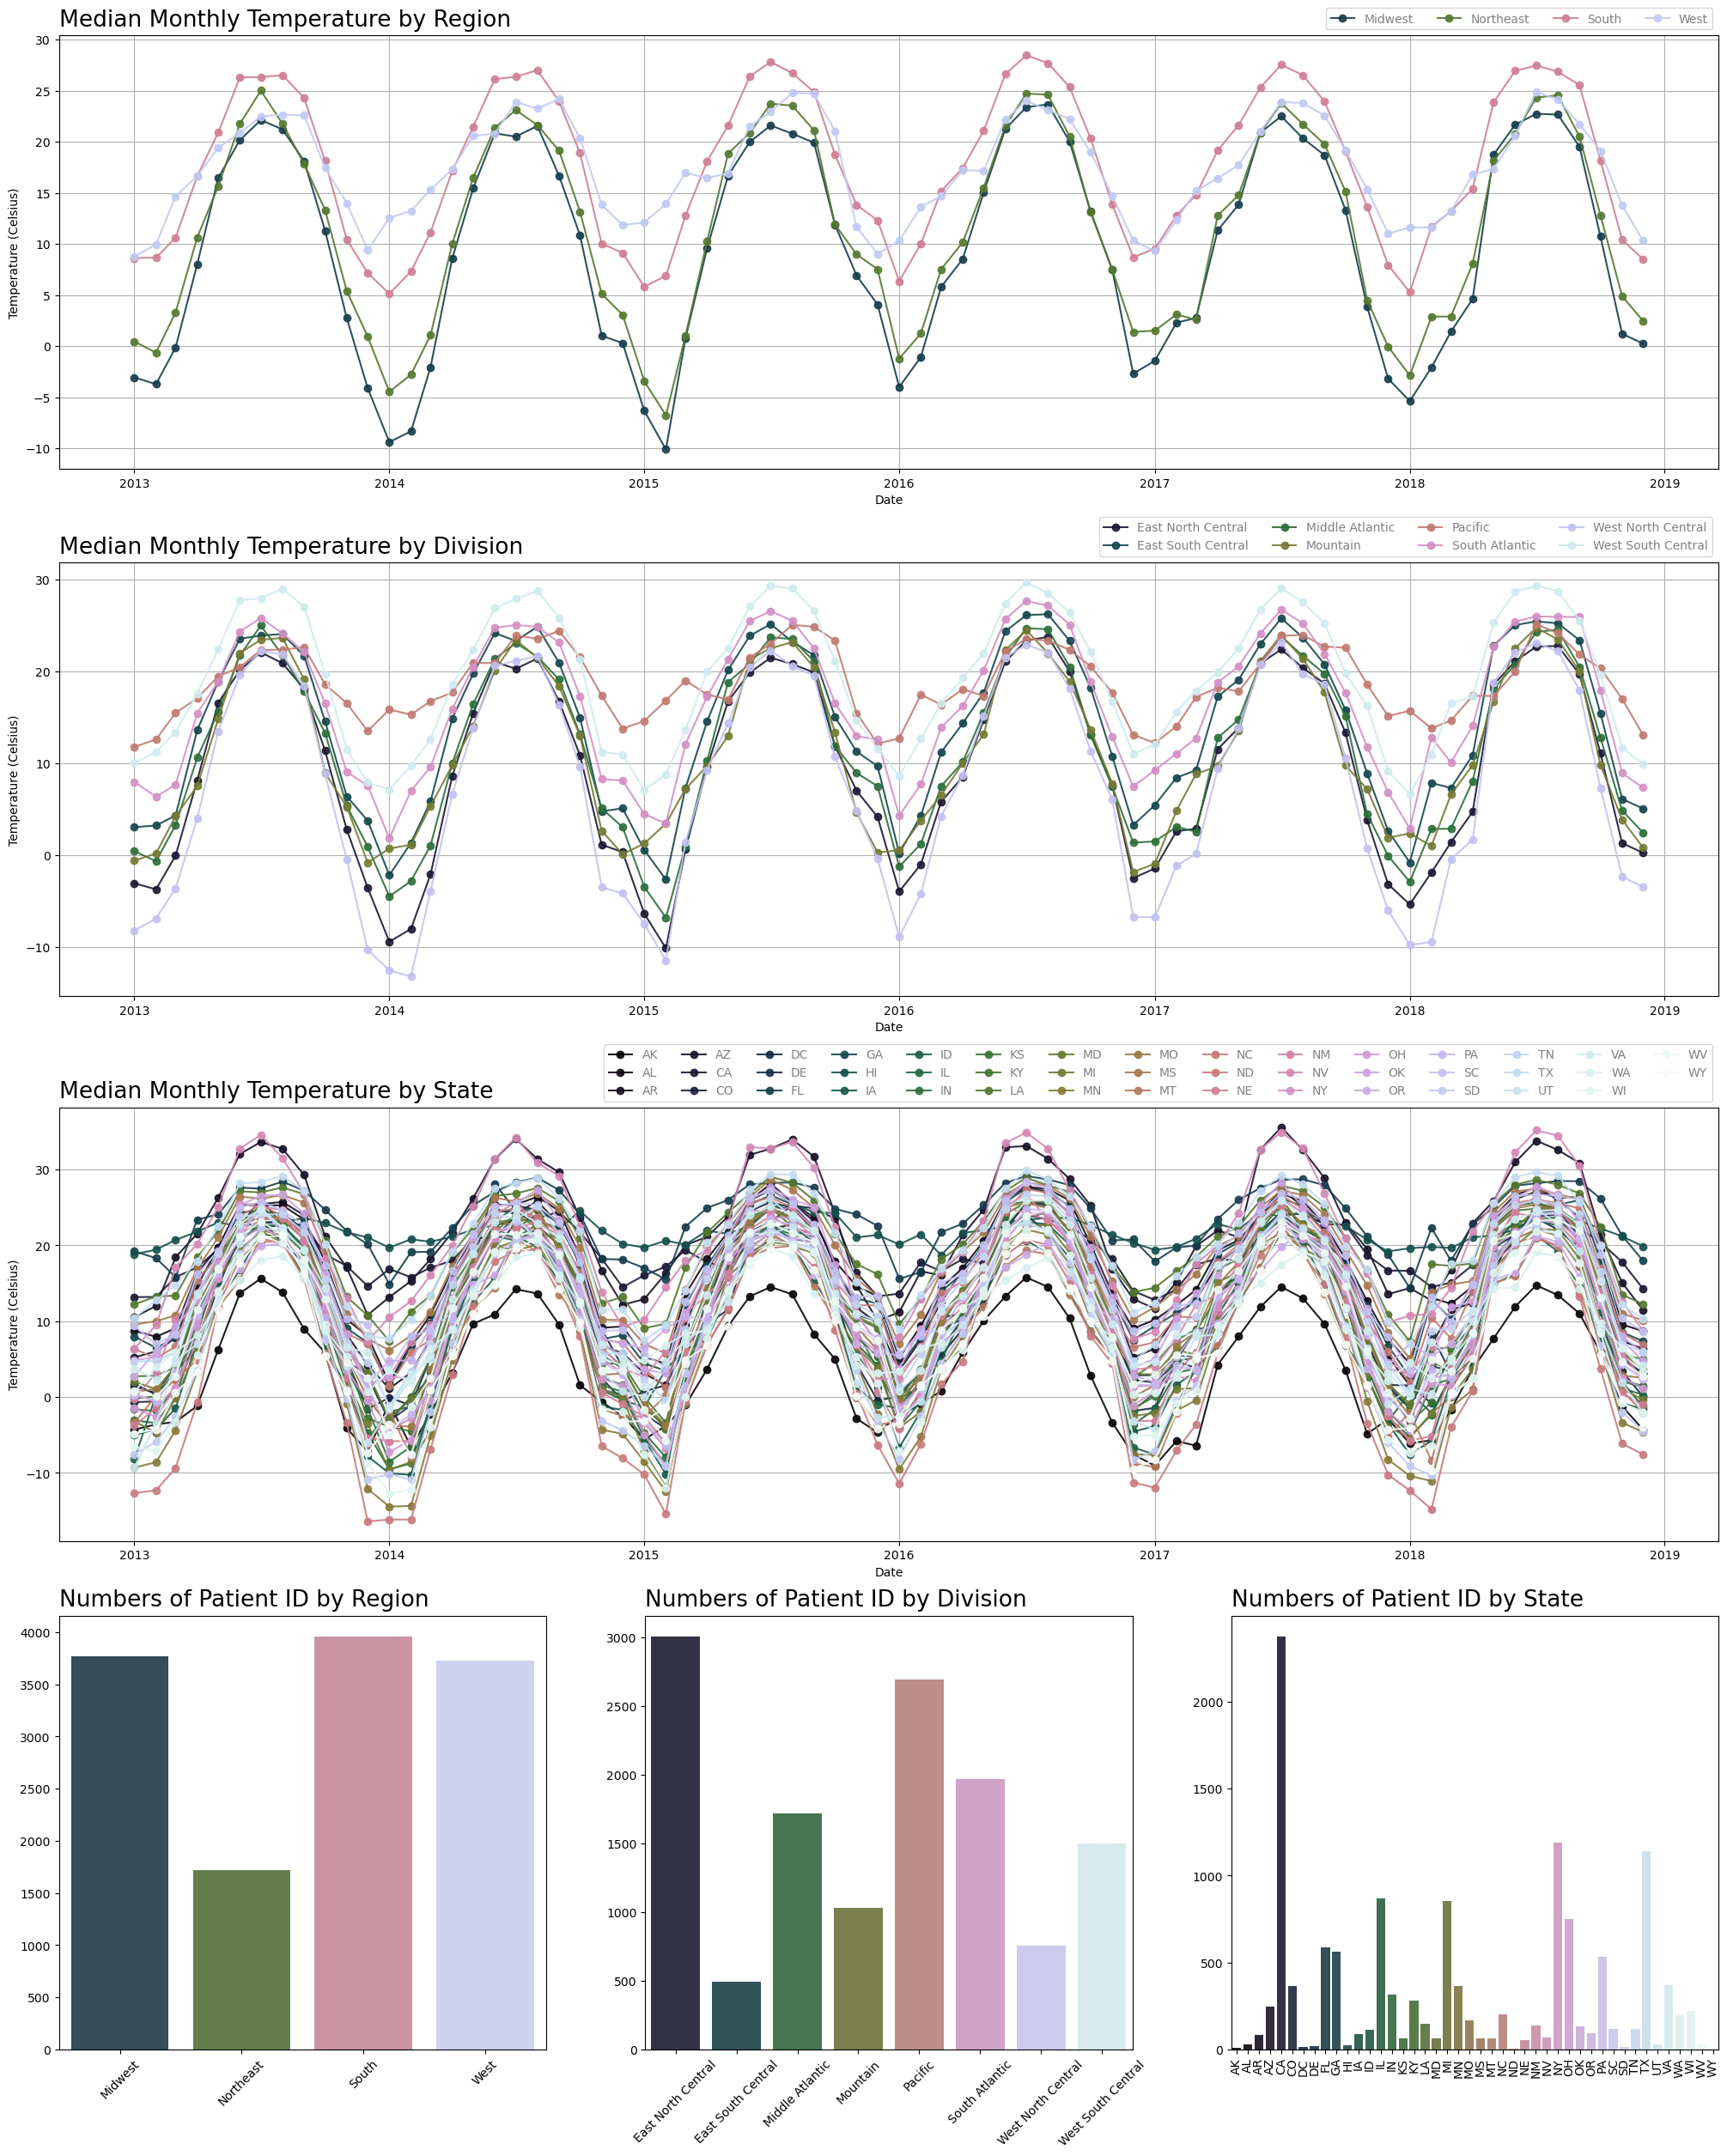

In [15]:
_columns = ["region", "division", "patient_state"]
_grid_dict = {
    "region": ["A", "D"],
    "division": ["B", "E"],
    "patient_state": ["C", "F"]
}
# Plot line plot for weather data and histograms for distribution
fig = plt.figure(figsize=[20, 25], layout="constrained", clear=True)
ax_dict = fig.subplot_mosaic([
    ["A", "A", "A"], 
    ["B", "B", "B"], 
    ["C", "C", "C"], 
    ["D", "E", "F"]
])


for _col in _columns:
    _df_train = (
        df_train[["patient_id", "patient_zip3"]]
        .merge(zip_region_dict[["patient_zip3", _col]], how="left", on="patient_zip3")
        .groupby(by=_col)["patient_id"]
        .count()
        .reset_index()
    )

    _df_weather = (
        weather_cleaned[WEATHER_COL[1:]+[_col]]
        .groupby(by=_col)
        .median()
        .transpose()
        .reset_index()
        .rename(columns={"index":"date_str"})
    )

    # Transform a column name like "average_of_jun_18" into a date format
    dates = []
    for name in _df_weather["date_str"]:
        # Extract month abbreviation and year
        month_abbr, year = name.split('_')[-2:]
        # Map month abbreviation to numeric value
        month_num = dt.datetime.strptime(month_abbr, '%b').month
        # Construct date string
        date_string = f"{month_num:02d}-{"20"+year}"
        # Convert to datetime object
        date_obj = dt.datetime.strptime(date_string, '%m-%Y')
        dates.append(date_obj)

    _df_weather["date"] = dates

    # Set the date as the index
    _df_weather.set_index("date", inplace=True)
    _df_weather = _df_weather.drop(columns=["date_str"])

    # Apply function to convert Fahrenheit to Celsius
    # (32°F − 32) × 5/9 = 0°C
    f_celsius = lambda x: (x-32) * 5/9
    _df_weather = _df_weather.apply(func=f_celsius, result_type='broadcast')
    
    # Colors for visualisation
    palette = sns.color_palette(palette="cubehelix", n_colors=len(_df_weather.columns))
    alpha = 0.9

    # Plots
    ax1 = ax_dict[_grid_dict[_col][0]]
    for i, lab in enumerate(_df_weather.columns):
        ax1.plot(_df_weather.index, _df_weather[lab], marker='o', label=lab, alpha=alpha, color=palette[i])

    ax1.set_xlabel("Date")
    ax1.set_ylabel("Temperature (Celsius)")
    ax1.set_title(
        f'Median Monthly Temperature by {_col.replace("patient_", "").title()}', 
        loc="left", 
        fontdict={"fontsize": 19},
        pad=8.0
    )
    ncol = [4 if len(_df_weather.columns) < 9 else 15]
    ax1.legend(loc='lower right', bbox_to_anchor=(1.0, 1.0), ncol=ncol[0], labelcolor='gray')
    ax1.grid(True)

    # Barplots
    ax2 = ax_dict[_grid_dict[_col][1]]
    sns.barplot(data=_df_train, x=_col, y="patient_id", ax=ax2, alpha=alpha, palette=palette)
    
    ax2.set_xlabel("")
    ax2.set_ylabel("")
    ax2.set_title(
        f'Numbers of Patient ID by {_col.replace("patient_", "").title()}', 
        loc="left", 
        fontdict={"fontsize": 19},
        pad=8.0
    )
    rotation = [90 if len(_df_weather.columns) > 8 else 45]
    ax2.xaxis.set_tick_params(rotation=rotation[0], labelsize=10)
    
    display(_df_weather.describe())

The data shows that there isn't a simple connection between the main measurement `metastatic diagnosis period` and the monthly temperature numbers. However, the pictures demonstrate that there's a clear pattern in climate information across different areas, parts, and states. Instead of just looking at temperatures, we can use details about where people are to add climate elements to our model. Also, it seems like there's a noticeable change in climate for some areas. The colder months (from November to February) are getting warmer. The difference is big, about 5°C, when we look at different regions.

*[<p align="right">Back to top of page</p>](#top)*

<h4 id="eda-structuring-sociotop">Examination of socioeconomic and demographic data patterns</h4>

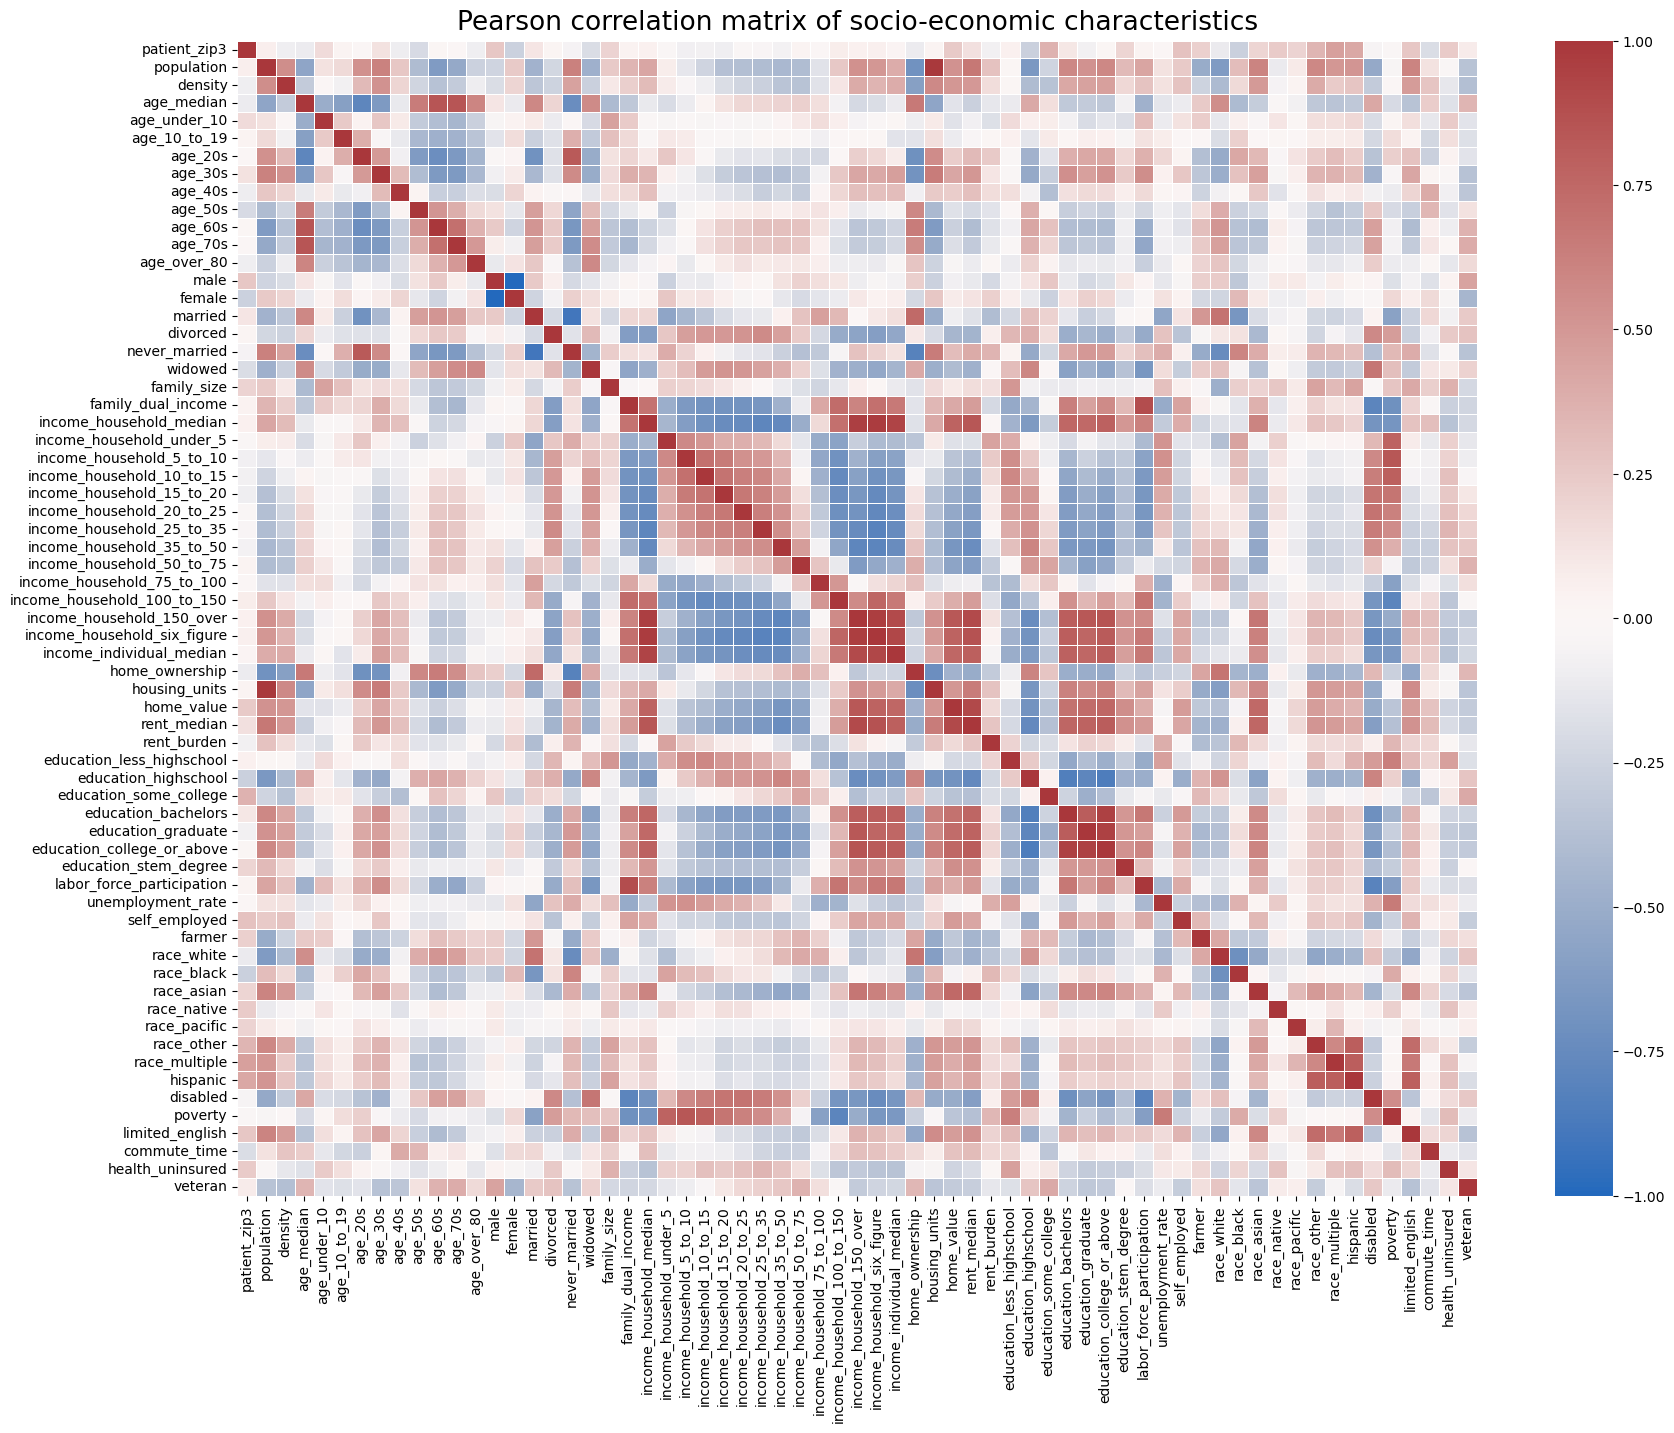

In [16]:
# Calculate correlation
correlation_matrix = social_metrics_dict.corr(method="pearson")

# Plot the correlation matrix
palette = sns.color_palette("vlag", as_cmap=True)

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, linewidth=.4, cmap=palette, vmin=-1, vmax=1)
plt.title(
    "Pearson correlation matrix of socio-economic characteristics", 
    fontdict={"fontsize": 19}, 
    pad=8.0
)
plt.show()

In [17]:
# Normalize numerical features and encode categorical features
numerical_features = social_metrics_dict.columns[1:].tolist()

scaler = StandardScaler()
_social_metrics_dict = social_metrics_dict.copy()
_social_metrics_dict[numerical_features] = scaler.fit_transform(_social_metrics_dict[numerical_features])

# One-hot encode categorical features
_social_metrics_dict = pd.get_dummies(social_metrics_dict, columns=["patient_zip3"])  # Adjusted variable name
display(_social_metrics_dict.head(3))

population  density  age_median  age_under_10  age_10_to_19  age_20s  \
0     4639.07    72.66       41.50         11.40         13.44    11.42   
1    10875.30   217.91       39.64         11.23         13.72    15.01   
2    18716.73  1019.51       30.37         11.00         18.86    23.11   

   age_30s  age_40s  age_50s  age_60s  age_70s  age_over_80   male  female  \
0    11.45    12.56    13.08    14.26     7.71         4.73  50.02   49.98   
1    12.02    11.58    11.77    12.77     8.52         3.41  51.33   48.67   
2    12.24     9.88     9.12     8.38     4.78         2.62  50.29   49.71   

   married  divorced  never_married  widowed  family_size  family_dual_income  \
0    42.37     14.70          34.76     8.18         3.30               38.83   
1    44.14     13.28          34.62     7.96         3.33               42.57   
2    35.99     12.76          46.65     4.63         3.15               54.23   

   income_household_median  income_household_under_5  \
0                 40643.61                      6.77   
1                 49924.38                      4.59   
2                 48238.92                      6.12   

   income_household_5_to_10  income_household_10_to_15  \
0                      5.02                       9.93   
1                      3.83                       6.58   
2                      4.73                       6.70   

   income_household_15_to_20  income_household_20_to_25  \
0                       7.53                       6.36   
1                       5.27                       5.90   
2                       4.86                       6.21   

   income_household_25_to_35  income_household_35_to_50  \
0                      11.54                      12.60   
1                      13.16                      13.99   
2                      11.19                      13.28   

   income_household_50_to_75  income_household_75_to_100  \
0                      12.70                       11.60   
1                      18.14                       10.65   
2                      16.98                       10.42   

   income_household_100_to_150  income_household_150_over  \
0                         9.53                       6.43   
1                        11.39                       6.49   
2                        11.80                       7.68   

   income_household_six_figure  income_individual_median  home_ownership  \
0                        15.97                  22663.32           74.78   
1                        17.88                  26495.64           67.09   
2                        19.48                  25137.57           47.85   

   housing_units  home_value  rent_median  rent_burden  \
0        1698.43    113973.9       671.07        37.23   
1        4034.71    119537.2       806.92        31.42   
2        7234.27    125587.7       978.00        38.84   

   education_less_highschool  education_highschool  education_some_college  \
0                      21.30                 36.81                   26.95   
1                      15.22                 31.24                   34.65   
2                      15.75                 27.97                   28.53   

   education_bachelors  education_graduate  education_college_or_above  \
0                 9.74                5.21                       14.94   
1                12.87                6.00                       18.88   
2                16.37               11.37                       27.74   

   education_stem_degree  labor_force_participation  unemployment_rate  \
0                  38.47                      49.41               8.08   
1                  36.55                      56.90               8.38   
2                  41.32                      62.04               5.44   

   self_employed  farmer  race_white  race_black  race_asian  race_native  \
0          12.89    4.88       66.51       29.06        0.40         0.37   
1          10.64    1.40       54.08       26.6

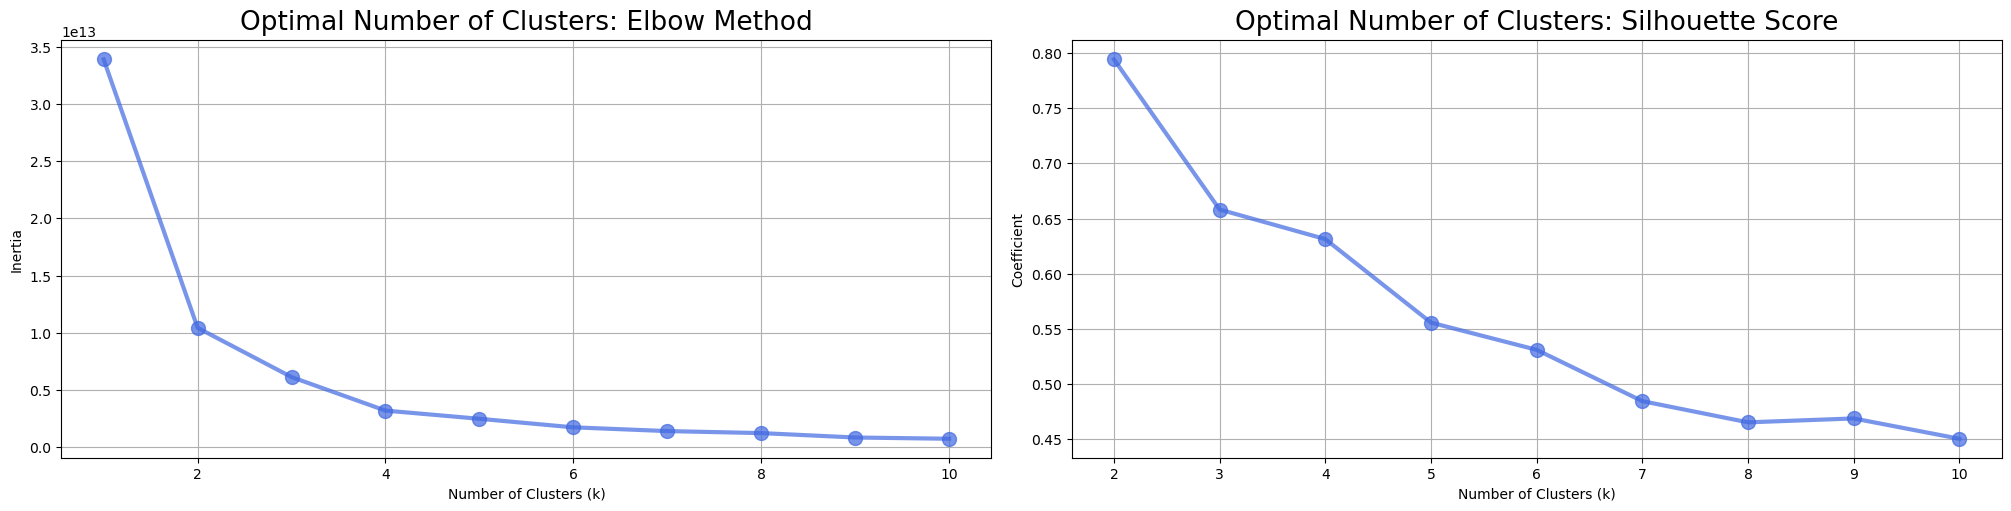

In [18]:
# Determine the optimal number of clusters
fig = plt.figure(figsize=[20, 5], constrained_layout=True)  # Adjusted layout argument
ax_dict = fig.subplot_mosaic([["a", "b"]])

# Elbow method:
wcss_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(_social_metrics_dict)
    wcss_list.append(kmeans.inertia_)

ax1 = ax_dict["a"]
ax1.plot(range(1, 11), wcss_list, marker="o", color="royalblue", alpha=0.7, markersize=10, linewidth=3.0)
ax1.set_title(
    "Optimal Number of Clusters: Elbow Method",
    fontdict={"fontsize": 19},
    pad=8.0
)
ax1.set_xlabel("Number of Clusters (k)")
ax1.set_ylabel("Inertia")
ax1.grid(True)

# Silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(_social_metrics_dict)
    score = silhouette_score(_social_metrics_dict, kmeans.labels_)
    silhouette_scores.append(score)

ax2 = ax_dict["b"]
ax2.plot(range(2, 11), silhouette_scores, marker="o", color="royalblue", alpha=0.7, markersize=10, linewidth=3.0)
ax2.set_title(
    "Optimal Number of Clusters: Silhouette Score", 
    fontdict={"fontsize": 19},
    pad=8.0
)
ax2.set_xlabel("Number of Clusters (k)")
ax2.set_ylabel("Coefficient")
ax2.grid(True)

In [19]:
# Apply KMeans to find clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_geo = kmeans.fit_predict(_social_metrics_dict)

# Calculate silhouette score to evaluate the cluster's quality
print(f"Number of clusters: {n_clusters}")
print(f"Silhouette score: {silhouette_score(_social_metrics_dict, labels_geo):.2f}")

# Assign cluster labels to the dataframe
social_metrics_dict["cluster"] = labels_geo

# Display the count of zip codes in each cluster
display(social_metrics_dict.groupby(["cluster"]).count()[["patient_zip3"]])

Number of clusters: 5
Silhouette score: 0.56


patient_zip3
cluster              
0                  41
1                 447
2                  68
3                 191
4                  15

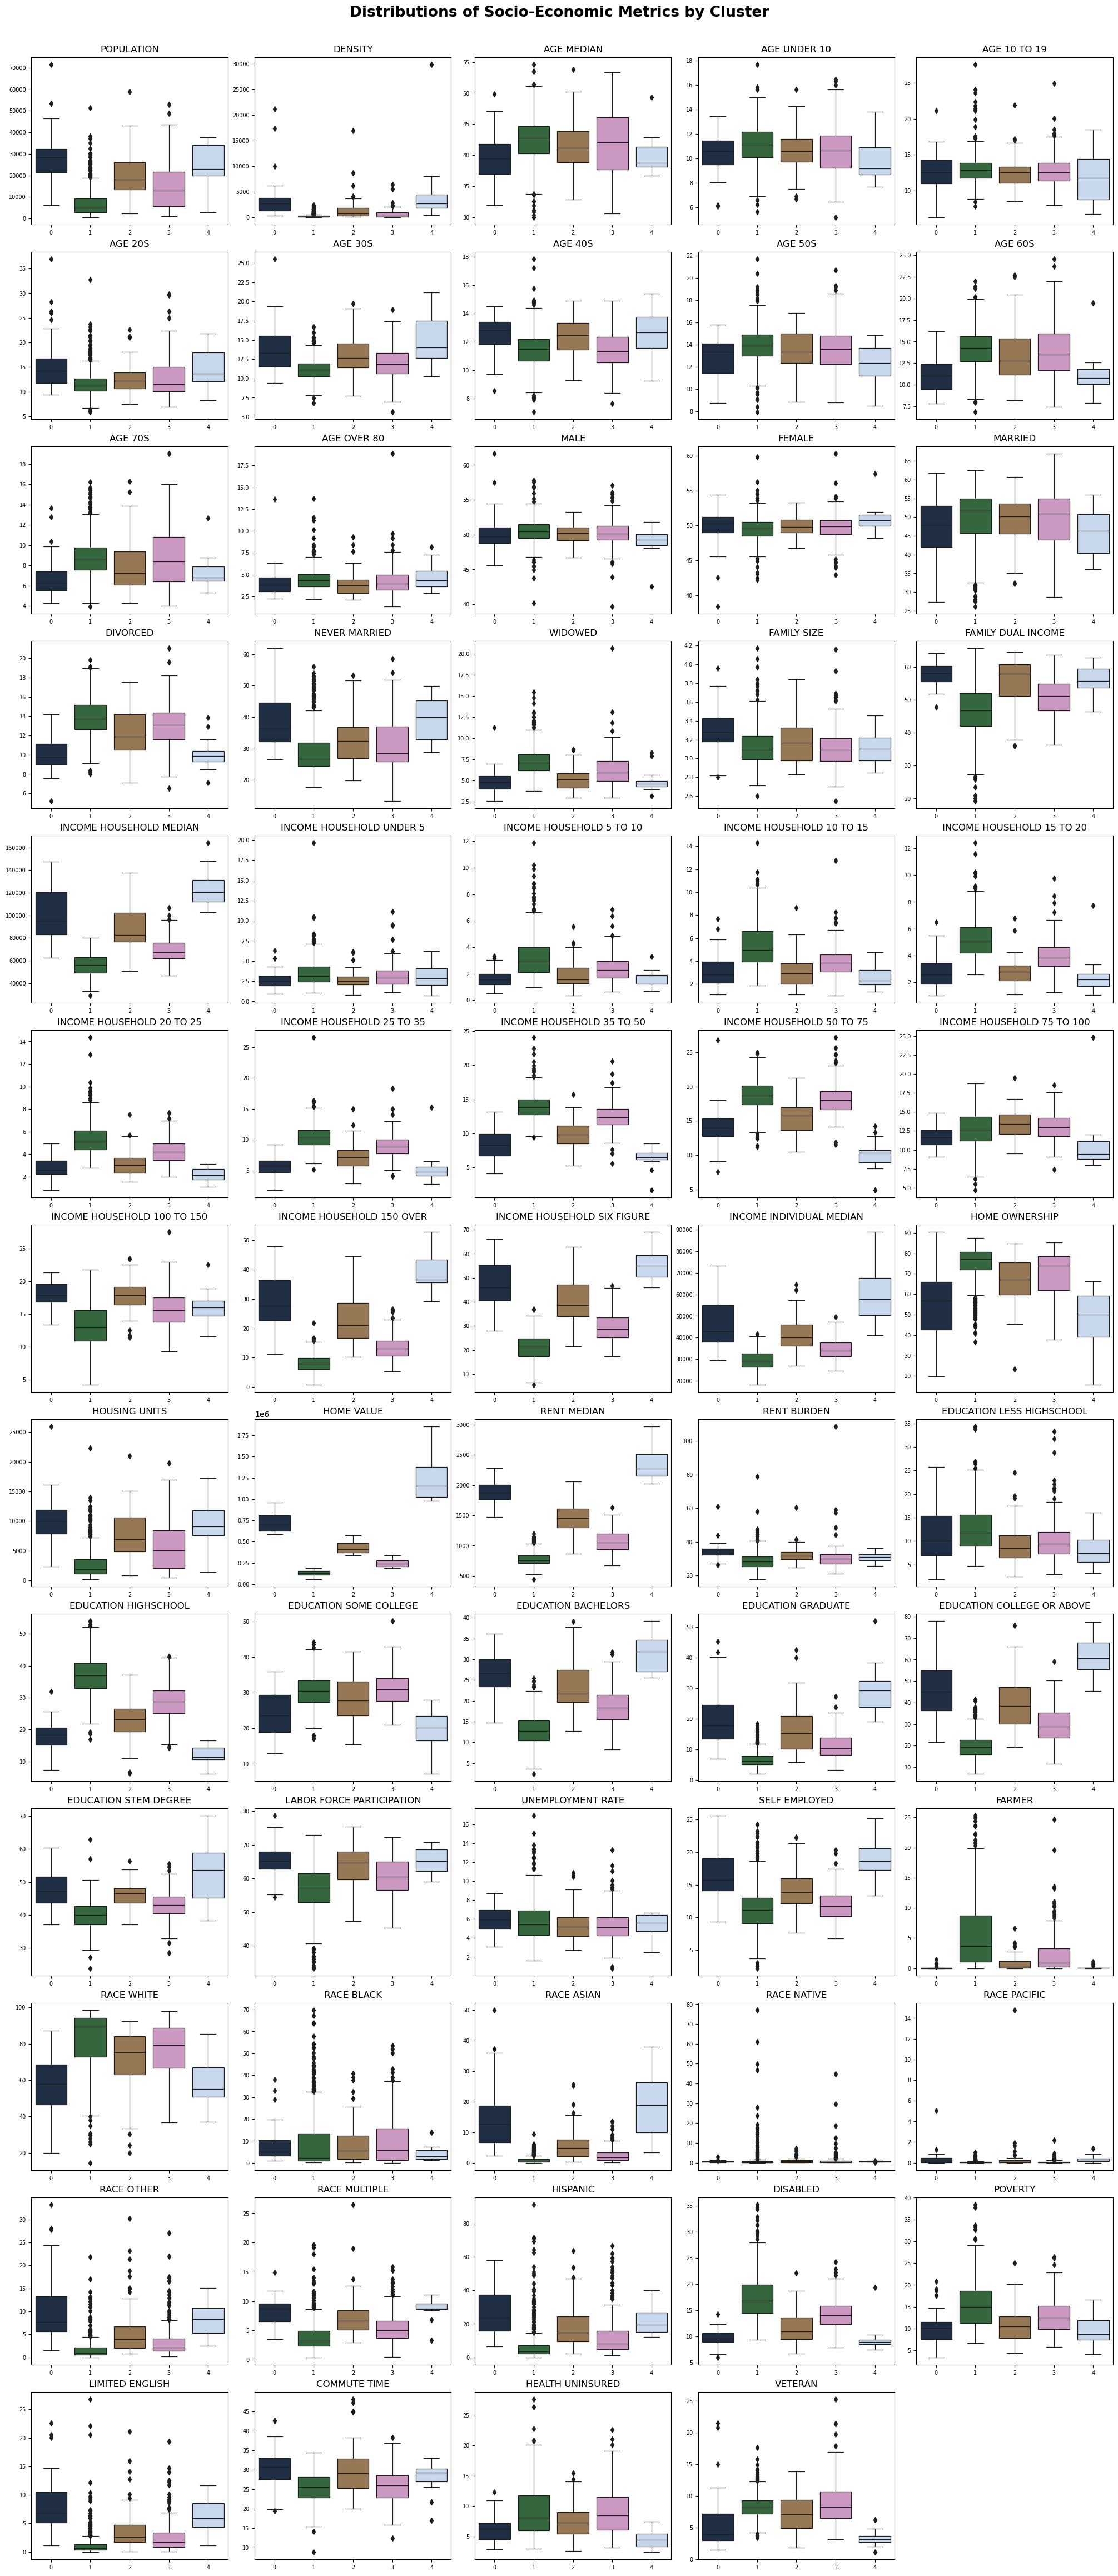

In [20]:
# Potential features for the model
columns = social_metrics_dict.columns[1:-1]  # Use all columns except 'patient_zip3' and 'cluster'

ncols = 5
nrows = ceil(len(columns) / ncols)
attr = 0

fig, axes = plt.subplots(nrows, ncols, figsize=[20, nrows*3.5], constrained_layout=True)  # Adjusted layout argument
fig.suptitle(
    "Distributions of Socio-Economic Metrics by Cluster", 
    fontsize=19, 
    y=1.015, 
    fontweight='bold'
)

for row in range(nrows):
    for col in range(ncols):
        if attr == len(columns):
            fig.delaxes(axes[row, col])
            continue
        
        sns.boxplot(
            x="cluster", 
            y=columns[attr], 
            data=social_metrics_dict, 
            ax=axes[row, col], 
            palette="cubehelix",
            linewidth=0.9
        )

        axes[row, col].set_title(
            columns[attr].replace("_", " ").upper(), 
            fontsize=12, 
            pad=6.0
        )
        axes[row, col].set_xlabel("")
        axes[row, col].set_ylabel("")
        axes[row, col].tick_params(labelsize=7)

        attr += 1

*[<p align="right">Back to top of page</p>](#top)*

<h4 id="eda-structuring-patient">Visualisation of individual patient's data</h4>

In [21]:
# Select relevant columns
col = [
    "patient_id", "patient_zip3", "patient_race", "payer_type", "patient_age", 
    "bmi", "breast_cancer_diagnosis_code", "metastatic_cancer_diagnosis_code"
]

# Create separate dataframes for personal information from test and train datasets
personal_test_df = df_test[col].copy()
personal_train_df = df_train[col].copy()

# Concatenate test and train dataframes
personal_df = pd.concat([personal_test_df, personal_train_df])

# Display descriptive statistics for test dataset
print("Testing dataset:")
display(personal_test_df.describe())

# Display descriptive statistics for training dataset
print("Training dataset:")
display(personal_train_df.describe())

Testing dataset:


patient_id  patient_zip3  patient_age          bmi
count    5646.000000   5646.000000  5646.000000  1705.000000
mean   549581.847680    569.824655    58.921537    29.142798
std    260549.557126    276.824893    13.326813     5.612167
min    100401.000000    100.000000    18.000000    16.000000
25%    325189.750000    330.000000    50.000000    24.840000
50%    551142.500000    554.000000    59.000000    28.340000
75%    773004.000000    836.000000    66.000000    33.140000
max    999846.000000    997.000000    91.000000    43.700000

Training dataset:


patient_id  patient_zip3   patient_age          bmi
count   13173.000000  13173.000000  13173.000000  4102.000000
mean   555441.784939    568.530859     59.271313    29.168808
std    259476.503094    275.758485     13.218883     5.752820
min    100043.000000    100.000000     18.000000    15.000000
25%    335100.000000    330.000000     50.000000    24.825000
50%    555769.000000    557.000000     59.000000    28.580000
75%    780967.000000    832.000000     67.000000    33.000000
max    999982.000000    995.000000     91.000000    97.000000

In [22]:
# Create dictionaries for training and testing dataframes
df = {
    "training": personal_train_df[["bmi", "patient_age"]],
    "testing": personal_test_df[["bmi", "patient_age"]]
}

print("Correlation between BMI and age:\n")
for key in df:
    for method in ["pearson", "spearman"]:
        # Calculate correlation coefficients for each method
        correlation = df[key]["bmi"].corr(df[key]["patient_age"], method=method)
        print(f"{method.title()} correlation coefficient in {key} data: {correlation:.3f}")
    print("")


Correlation between BMI and age:

Pearson correlation coefficient in training data: -0.064
Spearman correlation coefficient in training data: -0.031

Pearson correlation coefficient in testing data: -0.056
Spearman correlation coefficient in testing data: -0.033



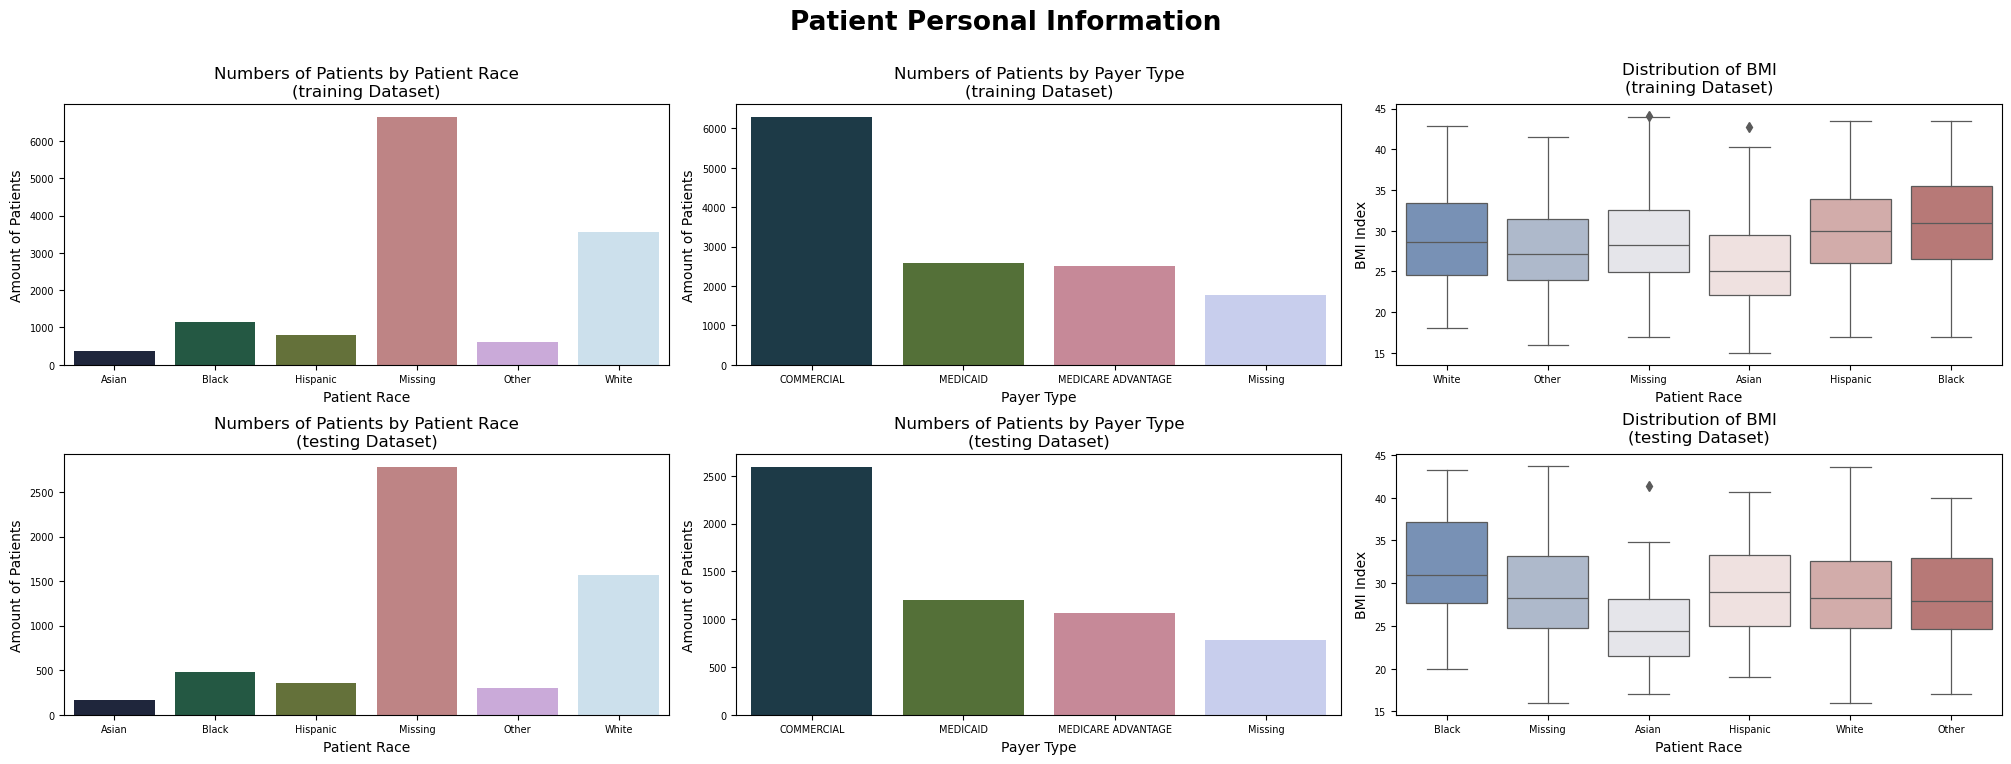

In [23]:
# Fill missing values for 'payer_type' and 'patient_race' with 'Missing'
df = {
    "training": personal_train_df.fillna(value={"payer_type": "Missing", "patient_race": "Missing"}),
    "testing": personal_test_df.fillna(value={"payer_type": "Missing", "patient_race": "Missing"})
}

# Define columns for analysis
columns = ["patient_race", "payer_type"]

# Create a figure for plotting
fig = plt.figure(figsize=[20, 7], alpha=0.7, constrained_layout=True)
axes = fig.subplots(2, 3)
fig.suptitle(
    "Patient Personal Information", 
    fontsize=19, 
    y=1.07, 
    fontweight="bold"
)

# Loop over datasets (training and testing)
for irow, key in enumerate(df):
    # Loop over columns
    for icol, col in enumerate(columns):
        # Group data by column and count patient IDs
        _df = df[key].groupby([col]).count().reset_index()
        # Plot barplot
        sns.barplot(x=_df[col], y=_df["patient_id"], palette="cubehelix", ax=axes[irow, icol])
        
        # Set labels and titles
        axes[irow, icol].set_ylabel("Amount of Patients")
        axes[irow, icol].set_xlabel(f'{col.replace("_", " ").title()}')
        axes[irow, icol].set_title(
            f"Numbers of Patients by {col.replace('_', ' ').title()}\n({key} Dataset)",
            fontdict={"fontsize": 12},
            pad=6.0
        )
        axes[irow, icol].tick_params(labelsize=7)

    # Plot boxplot for BMI distribution
    sns.boxplot(
        x="patient_race",
        y="bmi", 
        data=df[key].query("bmi < 50"), 
        orient="v", 
        ax=axes[irow, 2],
        palette="vlag",
        linewidth=.9
    )

    # Set labels and titles
    axes[irow, 2].set_ylabel("BMI Index")
    axes[irow, 2].set_xlabel("Patient Race")
    axes[irow, 2].set_title(
            f"Distribution of BMI\n({key} Dataset)",
            fontdict={"fontsize": 12},
            pad=9.0
        )
    axes[irow, 2].tick_params(labelsize=7)


In [24]:
# datasets = ["training", "testing"]
# diagnosis_codes = ["breast_cancer_diagnosis_code", "metastatic_cancer_diagnosis_code"]

# for dataset in datasets:
#     for diagnosis_code in diagnosis_codes:
#         counts = df[dataset].groupby([diagnosis_code]).count()[["patient_id"]].sort_values(["patient_id"])
#         print(f"{dataset.capitalize()} dataset - {diagnosis_code.replace('_', ' ').title()} Counts:")
#         display(counts)

*[<p align="right">Back to top of page</p>](#top)*

<h4 id="eda-structuring-takeaway">Key takeaways from the structuring phase</h4>

**New dictionaries have been created with cleaned data:**

- `zip_region_dict` contains general geographic information per postcode (state, region, division).
- `social_metrics_dict` includes general socio-economic and demographic data per zip code (age, income, education, race, and others). Additionally, a `cluster` column has been added to divide the data into 5 clusters with similar characteristics.

**Results of the examination of climate data:**

- No relationship was found between the target metric `metastatic_diagnosis_period` and climate data, neither linearly (Pearson correlation) nor non-linearly (Spearman correlation).
- The following patterns are most evident when examining monthly average temperature indicators in different regions and divisions:
    - The greatest differences are observed in the autumn-winter period (November-February), with temperatures falling below zero in the Midwest and Northeast.
    - In the spring-summer period, the hottest areas are in the southern and western regions.
    - Climate changes are mainly observed in regions with relatively cold winters; differences between 2014-2015 and 2016-2019 can reach +5°C. However, for the southern regions, the differences are not as noticeable, and the temperature in summer remains stable.

To incorporate the possible influence of climatic conditions into the model, categorical variables of the region or division can be used without additional temperature data. Additionally, the model's behavior can be checked by adding data for the coldest winter months (January-February), as these months exhibit the highest climate change signals.

**Results of the examination of socio-economic and demographic data:**

- All postcodes can be divided into 4-5 groups, which differ in parameters such as `population`, `age_median`, `household_income_median`, `rent_median`, `education_college_or_above`, `self_employed`, `disabled`, `limited_english`, and `health_uninsured`.
- Relationships between groups of characteristics:
    - Population, density, and number of housing units are correlated.
    - Age Median can represent all age attributes.
    - Income and education groups exhibit a strong linear correlation.
    - Race groups may depend on population size.
    - Unemployment rate depends on education and English level.
    - Gender, commuting time, and veteran attributes have the lowest correlations with other metrics.

**Results of the examination of socio-economic and demographic data:**

- Race and BMI have a high percentage of missing data, making it challenging to fill them using median or mode values as it could introduce bias into the model. Dropping these characteristics is also not ideal due to the limited amount of personal data available. One strategy could be to transform the data into specific categories such as "low," "normal," "high," or "unknown." However, for BMI, this might not be feasible due to the large amount of missing data (70%).
- Missing data in `payer_type` does not appear to be random and is consistent with the distribution of `health_uninsured` (6-12% depending on geographical data), indicating that it likely represents patients without insurance.
- For `breast_cancer_diagnosis_code` and `metastatic_cancer_diagnosis_code`, a large portion of the data is concentrated around a few codes, with some codes having only single observations. However, the distributions for the test and training datasets are similar.
    - Top-5 breast cancer codes: 1749, C50912, C50911, C50919, C50411.
    - Top-5 metastatic cancer codes: C773, C7951, C779, C7981, C7800.

*[<p align="right">Back to top of page</p>](#top)*

<h3 id="eda-cleaning">Cleaning phase</h3>

<h4 id="eda-cleaning-strategy">Cleaning data strategy overview</h4>

1) Drop the columns `metastatic_first_novel_treatment_type`, `metastatic_first_novel_treatment`, and `bmi` because they have over 70% missing data. With such a high percentage of missing values, any imputation method would introduce significant uncertainty and potential bias into the model. Also, drop the column `patient_gender`.
2) Create new categories for `patient_race` such as "white", "other", and "unknown".
3) Fill the missing values in `payer_type` with "no insurance".
4) Possible strategies for handling climate data:
    - Use `division` as a more relevant attribute related to weather patterns (as clusters).
    - Use `division` and the temperature of January per year (winter months demonstrate more visible changes in temperature year-over-year).
    - There isn't any correlation between the target metrics and climate data, so not using climate data should not affect the results.
5) Remove rows from the training dataset:
    - With the 772 postcode because it has missing data (0.04%).
    - With male-specific codes C50421, C50922, C50221, C50122, and the unspecified code C509.
6) Select the following columns related to social, economic, and demographic information: `population`, `age_median`, `household_income_median`, `rent_median`, `education_college_or_above`, `self_employed`, `disabled`, `limited_english`, `health_uninsured`, and `commute_time`. Drop the others.
7) Validate the resulting datasets.

In [25]:
TARGET = ["metastatic_diagnosis_period"]

patient_features = [
    # Key for joining dictionaries
    "patient_zip3",
    # Individual patient data
    "patient_id", "patient_race", "payer_type", "patient_age", 
    "breast_cancer_diagnosis_code", "metastatic_cancer_diagnosis_code",  
]

social_features = [
    # Key for joining dictionaries
    "patient_zip3",
    # Social, economic, and demographic information
    "population", "age_median", "income_household_median", "rent_median", 
    "education_college_or_above", "self_employed", "disabled", 
    "limited_english", "health_uninsured", "commute_time"
]

geographical_features = [
    "patient_zip3", "region_num", "division_num", "division"
]

def cleaned_df(df, patient_features, social_features, geographical_features, target=None):
    if target != None:
        patient_features = patient_features + target
    new_df = (
        df[patient_features]
        .merge(breast_cancer_diagnosis_dict, on="breast_cancer_diagnosis_code")
        .merge(zip_region_dict[geographical_features], on="patient_zip3")
        .merge(social_metrics_dict[social_features], on="patient_zip3")
        .merge(weather_dict, on="division_num")
    )

    new_df["payer_type"] = new_df["payer_type"].fillna("no insurance").str.lower()

    new_df["patient_race"] = (
        new_df["patient_race"]
        .fillna("unknown")
        .apply(lambda x: x.lower() if x == "White" or x == "unknown" else "other")
    )

    display(new_df.info())

    return new_df

print("Training dataset:\n")
cleaned_train_df = cleaned_df(
    df=df_train, 
    patient_features=patient_features, 
    social_features=social_features, 
    geographical_features=geographical_features, 
    target=TARGET
)

print("Testing dataset:\n")
cleaned_test_df = cleaned_df(
    df=df_test, 
    patient_features=patient_features, 
    social_features=social_features, 
    geographical_features=geographical_features
)

Training dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13160 entries, 0 to 13159
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient_zip3                      13160 non-null  int64  
 1   patient_id                        13160 non-null  int64  
 2   patient_race                      13160 non-null  object 
 3   payer_type                        13160 non-null  object 
 4   patient_age                       13160 non-null  int64  
 5   breast_cancer_diagnosis_code      13160 non-null  object 
 6   metastatic_cancer_diagnosis_code  13160 non-null  object 
 7   metastatic_diagnosis_period       13160 non-null  int64  
 8   breast_cancer_diagnosis_desc      13160 non-null  object 
 9   region_num                        13160 non-null  int64  
 10  division_num                      13160 non-null  int64  
 11  division                          13160 non-null

None

Testing dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5646 entries, 0 to 5645
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient_zip3                      5646 non-null   int64  
 1   patient_id                        5646 non-null   int64  
 2   patient_race                      5646 non-null   object 
 3   payer_type                        5646 non-null   object 
 4   patient_age                       5646 non-null   int64  
 5   breast_cancer_diagnosis_code      5646 non-null   object 
 6   metastatic_cancer_diagnosis_code  5646 non-null   object 
 7   breast_cancer_diagnosis_desc      5646 non-null   object 
 8   region_num                        5646 non-null   int64  
 9   division_num                      5646 non-null   int64  
 10  division                          5646 non-null   object 
 11  population                        5646 non-null   f

None

*[<p align="right">Back to top of page</p>](#top)*

<h4 id="eda-cleaning-validation">Resulting dataset validation</h4>

1. Check the correlation between the categorical, numeric and target columns.

Pairs with correlation between -1 and -0.1 or 0.1 and 1:

Correlation between patient_race_num and patient_age: 0.1075
Correlation between patient_race_num and population: -0.2089
Correlation between patient_race_num and age_median: 0.1731
Correlation between patient_race_num and rent_median: -0.1676
Correlation between patient_race_num and self_employed: -0.1919
Correlation between patient_race_num and disabled: 0.1081
Correlation between patient_race_num and limited_english: -0.2212
Correlation between patient_race_num and health_uninsured: -0.1170
Correlation between patient_race_num and commute_time: -0.1122
Correlation between payer_type_num and patient_age: 0.2848
Correlation between patient_race_num and metastatic_diagnosis_period: 0.1763
Correlation between payer_type_num and metastatic_diagnosis_period: 0.1818
Correlation between breast_cancer_diagnosis_code_num and metastatic_diagnosis_period: 0.1957
Correlation between metastatic_cancer_diagnosis_code_num and metastatic_diag

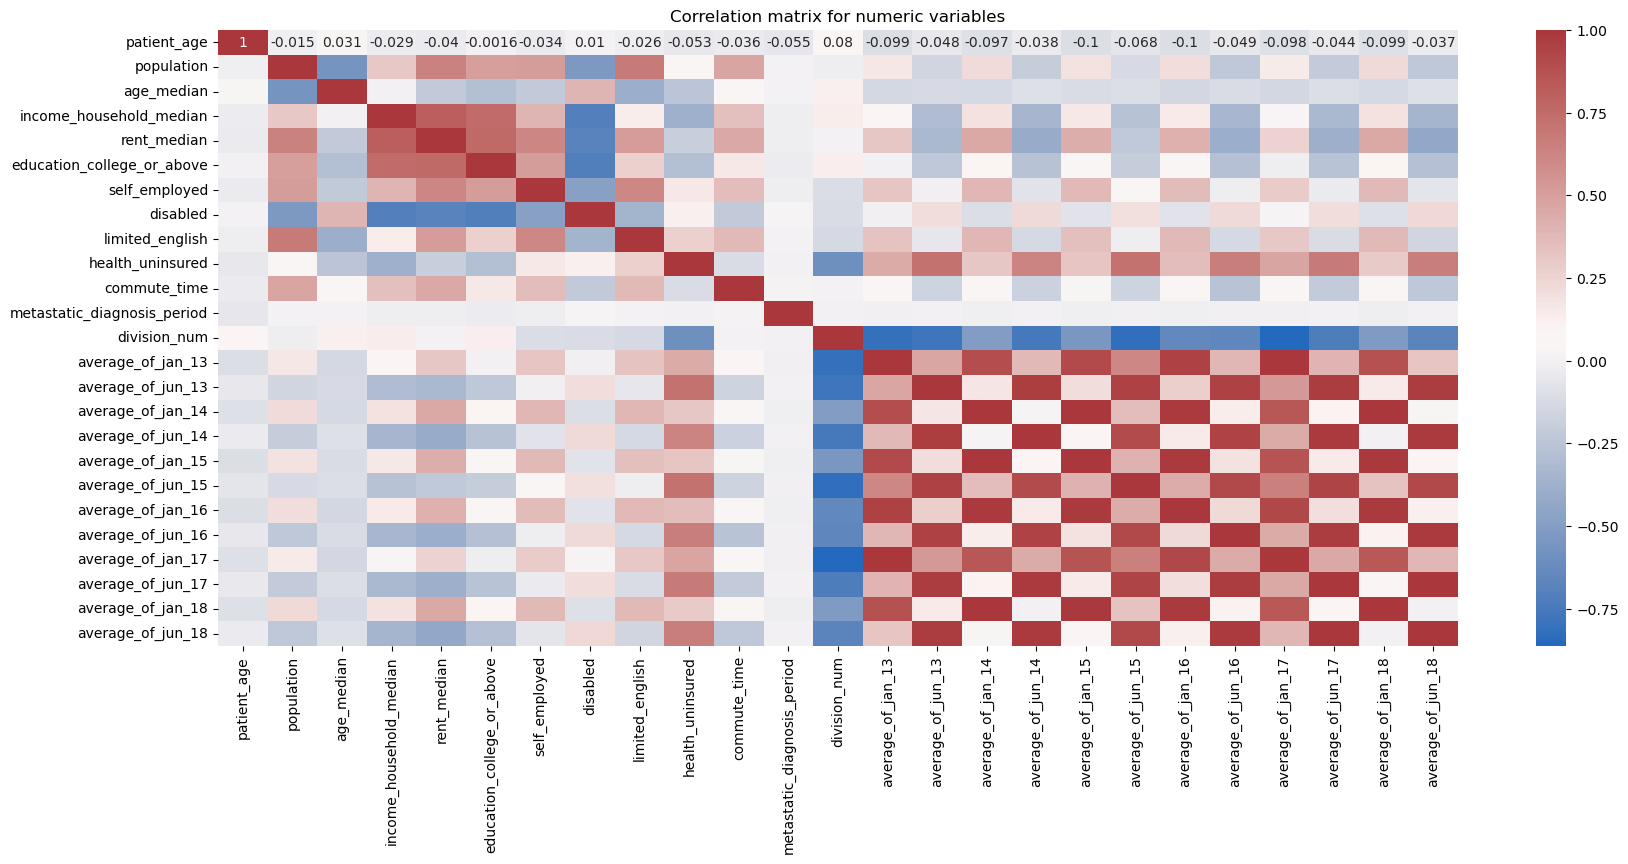

In [26]:
# Columns by type
categorical_columns = ["patient_race", "payer_type", "breast_cancer_diagnosis_code", "metastatic_cancer_diagnosis_code"]
numerical_columns = [
    "patient_age", "population", "age_median", "income_household_median", "rent_median", "education_college_or_above", 
    "self_employed", "disabled", "limited_english", "health_uninsured", "commute_time"
]

# Collect correlations
correlation_results = {}

# Convert the categorical variables into numerical format using Label Encoding
label_encoder = LabelEncoder()

encoded_df = cleaned_train_df.copy()
for col in categorical_columns:
    _col = f"{col}_num"
    encoded_df[_col] = label_encoder.fit_transform(encoded_df[col].astype(str))


# Calculate correlation between categorical and numeric variables using Cramér's V test
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))


for cat_col in categorical_columns:
    cat_col = f"{cat_col}_num"
    for num_col in numerical_columns:
        correlation = pointbiserialr(encoded_df[cat_col], encoded_df[num_col])[0]
        correlation_results[(cat_col, num_col)] = correlation

for num_col in numerical_columns:
    for cat_col in categorical_columns:
        cat_col = f"{cat_col}_num"
        correlation = cramers_v(encoded_df[cat_col], encoded_df[TARGET[0]])
        correlation_results[(cat_col, TARGET[0])] = correlation


# Print or visualize the correlation results for categorical-numeric and categorical-target pairs
print("Pairs with correlation between -1 and -0.1 or 0.1 and 1:\n")
for key, value in correlation_results.items():
        if -1<value<-0.1 or 0.1<value<1:
            print(f"Correlation between {key[0]} and {key[1]}: {value:.4f}")


# Calculate Pearson correlation for numeric-numeric variables
numeric_corr = encoded_df[numerical_columns + TARGET + [i for i in weather_dict.columns if i.find("avg")]].corr(method='pearson')
# Visualize the numeric correlations
plt.figure(figsize=(20, 8))
sns.heatmap(numeric_corr, annot=True, cmap='vlag')
plt.title('Correlation matrix for numeric variables')
plt.show()


*[<p align="right">Back to top of page</p>](#top)*

<h4 id="eda-cleaning-selection">Attribute selection and final data transformation</h4>

In [27]:
selected_features = [
    "patient_id", 
    # There is a correlation with the target metric (about 0.2):
    "patient_race", "payer_type", "breast_cancer_diagnosis_code", "metastatic_cancer_diagnosis_code",
    # There is a linear relationship with weather:
    "division",
    # Other features:
    "patient_age", "age_median", "rent_median", "self_employed", 
    "disabled", "limited_english", "health_uninsured", "commute_time"
]

In [28]:
# Re-check correlation (should not be above 0.75)
numeric_corr[[i for i in numeric_corr.columns if i in selected_features]].drop(index=[i for i in numeric_corr.columns if i not in selected_features])

patient_age  age_median  rent_median  self_employed  \
patient_age          1.000000    0.030508    -0.040277      -0.034021   
age_median           0.030508    1.000000    -0.215322      -0.216487   
rent_median         -0.040277   -0.215322     1.000000       0.618955   
self_employed       -0.034021   -0.216487     0.618955       1.000000   
disabled             0.010176    0.395557    -0.685147      -0.489229   
limited_english     -0.025653   -0.389868     0.513963       0.612503   
health_uninsured    -0.053319   -0.247494    -0.200228       0.156191   
commute_time        -0.036340    0.044981     0.447177       0.356441   

                  disabled  limited_english  health_uninsured  commute_time  
patient_age       0.010176        -0.025653         -0.053319     -0.036340  
age_median        0.395557        -0.389868         -0.247494      0.044981  
rent_median      -0.685147         0.513963         -0.200228      0.447177  
self_employed    -0.489229         0.612503          0.156191      0.356441  
disabled          1.000000        -0.358406          0.121949     -0.220476  
limited_english  -0.358406         1.000000          0.267398      0.374990  
health_uninsured  0.121949         0.267398          1.000000     -0.113318  
commute_time     -0.220476         0.374990         -0.113318      1.000000

In [29]:
# Final encoding
def encode_columns(df, selected_features, target=None):
    if target != None:
        selected_features = (selected_features + target)

    new_df = df[selected_features].copy()

    # numerical feature scaling (label_encoder = LabelEncoder())
    for col in ["patient_race", "payer_type", "division", "breast_cancer_diagnosis_code", "metastatic_cancer_diagnosis_code"]:
        new_df[col] = label_encoder.fit_transform(new_df[col].astype(str))
    
    # numerical feature normalisation (scaler = StandardScaler())
    num_col = [
        "patient_age", "age_median", "rent_median", "self_employed", 
        "disabled", "limited_english", "health_uninsured", "commute_time"
    ]
    new_df[num_col] = scaler.fit_transform(new_df[num_col])

    # rename columns in pythonic style
    new_df.columns = [i.lower().replace(" ", "_") for i in new_df.columns]
    
    return new_df


train_model_df = encode_columns(cleaned_train_df, selected_features=selected_features, target=TARGET)
test_model_df = encode_columns(cleaned_test_df, selected_features=selected_features)

print("Final training dataset: ")
display(train_model_df.head())
display(train_model_df.describe())
display(train_model_df.info())

print("\n\nFinal testing dataset: ")
display(test_model_df.head())
display(test_model_df.describe())
display(test_model_df.info())

Final training dataset: 


patient_id  patient_race  payer_type  breast_cancer_diagnosis_code  \
0      268700             1           0                            40   
1      484983             2           3                            26   
2      277055             1           0                             7   
3      320055             0           1                            39   
4      190386             1           0                             6   

   metastatic_cancer_diagnosis_code  division  patient_age  age_median  \
0                                 3         7    -1.533432    0.505885   
1                                 3         0    -0.323312    0.745086   
2                                 3         4    -0.020782   -1.063873   
3                                 3         4    -0.020782   -0.971680   
4                                30         4     0.886808    0.306551   

   rent_median  self_employed  disabled  limited_english  health_uninsured  \
0    -1.373511      -0.402698  2.385691        -0.832443         -0.108859   
1    -1.380020      -1.179178  1.822921        -0.830351         -0.379858   
2     0.936592       0.007685 -0.160300         0.037716         -0.106461   
3     0.982106       2.375506 -0.411923         2.162914          0.437934   
4     0.937058       0.397401 -0.395689         0.238522         -0.473388   

   commute_time  metastatic_diagnosis_period  
0     -0.516297                          191  
1     -0.337293                           33  
2      1.789118                          157  
3      0.538056                          146  
4     -0.884140                          286

patient_id  patient_race    payer_type  \
count   13160.000000  13160.000000  13160.000000   
mean   555557.411854      1.046581      0.981687   
std    259478.753929      0.701980      1.097725   
min    100043.000000      0.000000      0.000000   
25%    335176.500000      1.000000      0.000000   
50%    555958.000000      1.000000      1.000000   
75%    781062.250000      2.000000      2.000000   
max    999982.000000      2.000000      3.000000   

       breast_cancer_diagnosis_code  metastatic_cancer_diagnosis_code  \
count                  13160.000000                      13160.000000   
mean                      26.577964                         11.906763   
std                       13.799940                         13.085114   
min                        0.000000                          0.000000   
25%                       14.000000                          3.000000   
50%                       28.000000                          3.000000   
75%                       40.000000                         25.000000   
max                       41.000000                         42.000000   

           division   patient_age    age_median   rent_median  self_employed  \
count  13160.000000  1.316000e+04  1.316000e+04  1.316000e+04   1.316000e+04   
mean       3.238526  2.310884e-16  6.198352e-16  1.371412e-16   4.084541e-16   
std        2.327542  1.000038e+00  1.000038e+00  1.000038e+00   1.000038e+00   
min        0.000000 -3.121714e+00 -2.621172e+00 -1.823728e+00  -3.225188e+00   
25%        1.000000 -7.014742e-01 -8.371298e-01 -7.960612e-01  -6.477468e-01   
50%        4.000000 -2.078170e-02  2.249933e-02 -1.743338e-01  -1.340300e-01   
75%        5.000000  5.842783e-01  5.937167e-01  5.787330e-01   5.538781e-01   
max        7.000000  2.399458e+00  3.493408e+00  4.047702e+00   3.647988e+00   

           disabled  limited_english  health_uninsured  commute_time  \
count  1.316000e+04     1.316000e+04      1.316000e+04  1.316000e+04   
mean  -7.221511e-17    -5.885194e-17      5.183290e-17  2.435067e-16   
std    1.000038e+00     1.000038e+00      1.000038e+00  1.000038e+00   
min   -2.005534e+00    -9.202956e-01     -1.456657e+00 -3.051860e+00   
25%   -8.367055e-01    -7.236731e-01     -6.988207e-01 -6.107167e-01   
50%   -1.251268e-01    -3.450700e-01     -2.767344e-01 -5.206671e-02   
75%    6.162137e-01     3.305586e-01      4.523237e-01  5.380565e-01   
max    5.881355e+00     4.677172e+00      4.570063e+00  3.943067e+00   

       metastatic_diagnosis_period  
count                 13160.000000  
mean                     96.521884  
std                     108.986823  
min                       0.000000  
25%                       3.000000  
50%                      44.000000  
75%                     181.000000  
max                     365.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13160 entries, 0 to 13159
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient_id                        13160 non-null  int64  
 1   patient_race                      13160 non-null  int64  
 2   payer_type                        13160 non-null  int64  
 3   breast_cancer_diagnosis_code      13160 non-null  int64  
 4   metastatic_cancer_diagnosis_code  13160 non-null  int64  
 5   division                          13160 non-null  int64  
 6   patient_age                       13160 non-null  float64
 7   age_median                        13160 non-null  float64
 8   rent_median                       13160 non-null  float64
 9   self_employed                     13160 non-null  float64
 10  disabled                          13160 non-null  float64
 11  limited_english                   13160 non-null  float64
 12  heal

None



Final testing dataset: 


patient_id  patient_race  payer_type  breast_cancer_diagnosis_code  \
0      730681             1           0                             5   
1      334212             0           3                            39   
2      571362             1           0                             1   
3      907331             1           0                             6   
4      208382             0           3                            25   

   metastatic_cancer_diagnosis_code  division  patient_age  age_median  \
0                                34         7    -0.294285    0.248681   
1                                 3         5     0.080931   -0.218301   
2                                 3         7    -0.369329   -2.545680   
3                                28         1     0.306061    0.956686   
4                                18         4     0.231018   -0.208259   

   rent_median  self_employed  disabled  limited_english  health_uninsured  \
0    -1.298513      -0.105883  1.852246        -0.816126         -0.116420   
1    -0.983915      -0.761477  1.176134        -0.498253          1.176372   
2    -0.587731      -0.659496 -0.030632        -0.221397          1.438747   
3    -1.047807       0.106821  2.038109        -0.818176          0.510894   
4     1.580323      -0.152503 -0.997661         0.114933         -0.800980   

   commute_time  
0      0.327292  
1     -0.415824  
2     -2.498921  
3     -0.071936  
4      0.637582

patient_id  patient_race   payer_type  breast_cancer_diagnosis_code  \
count    5646.000000    5646.00000  5646.000000                   5646.000000   
mean   549581.847680       1.04729     1.006553                     25.720687   
std    260549.557126       0.71034     1.097445                     13.547270   
min    100401.000000       0.00000     0.000000                      0.000000   
25%    325189.750000       1.00000     0.000000                     10.000000   
50%    551142.500000       1.00000     1.000000                     27.000000   
75%    773004.000000       2.00000     2.000000                     38.000000   
max    999846.000000       2.00000     3.000000                     40.000000   

       metastatic_cancer_diagnosis_code     division   patient_age  \
count                       5646.000000  5646.000000  5.646000e+03   
mean                          11.251328     3.290648  2.554732e-16   
std                           11.732993     2.321466  1.000089e+00   
min                            0.000000     0.000000 -3.070889e+00   
25%                            3.000000     1.000000 -6.695020e-01   
50%                            3.000000     4.000000  5.888098e-03   
75%                           24.000000     5.000000  5.311915e-01   
max                           37.000000     7.000000  2.407275e+00   

         age_median   rent_median  self_employed      disabled  \
count  5.646000e+03  5.646000e+03   5.646000e+03  5.646000e+03   
mean   5.411502e-17  3.146222e-17   3.964239e-16 -7.771168e-17   
std    1.000089e+00  1.000089e+00   1.000089e+00  1.000089e+00   
min   -2.631042e+00 -1.814167e+00  -3.034204e+00 -1.854249e+00   
25%   -8.484760e-01 -8.060629e-01  -6.594961e-01 -8.252655e-01   
50%    3.276438e-02 -1.558620e-01  -1.525034e-01 -1.329914e-01   
75%    6.102154e-01  6.359256e-01   5.759345e-01  6.239309e-01   
max    3.530109e+00  4.014298e+00   3.580012e+00  5.846964e+00   

       limited_english  health_uninsured  commute_time  
count     5.646000e+03      5.646000e+03  5.646000e+03  
mean     -4.908106e-17     -1.459847e-16 -5.002493e-16  
std       1.000089e+00      1.000089e+00  1.000089e+00  
min      -9.289191e-01     -1.485540e+00 -3.785539e+00  
25%      -7.361449e-01     -6.793334e-01 -6.169202e-01  
50%      -3.649519e-01     -2.857712e-01 -5.217189e-02  
75%       4.148608e-01      5.061237e-01  5.249288e-01  
max       4.558994e+00      4.508532e+00  3.946029e+00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5646 entries, 0 to 5645
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient_id                        5646 non-null   int64  
 1   patient_race                      5646 non-null   int64  
 2   payer_type                        5646 non-null   int64  
 3   breast_cancer_diagnosis_code      5646 non-null   int64  
 4   metastatic_cancer_diagnosis_code  5646 non-null   int64  
 5   division                          5646 non-null   int64  
 6   patient_age                       5646 non-null   float64
 7   age_median                        5646 non-null   float64
 8   rent_median                       5646 non-null   float64
 9   self_employed                     5646 non-null   float64
 10  disabled                          5646 non-null   float64
 11  limited_english                   5646 non-null   float64
 12  health

None

*[<p align="right">Back to top of page</p>](#top)*

<h2 id="ml">Machine learning</h2>

<h3 id="ml-construction">Construction phase</h3>

**1. Split the data and define the functions to ﬁt models and get performance metrics.**

In [30]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    train_model_df.loc[:, ~train_model_df.columns.isin(["patient_id", TARGET[0]])], 
    train_model_df[TARGET[0]], 
    test_size=0.2, 
    random_state=42, 
    shuffle=False
)


# Evaluating the performance of a model
def performance_metrics(y_true, y_pred, model_name='', type_model=''):
    title = f"Metrics for {model_name} model:"

    if type_model == "classification":
        # The ratio of correctly predicted instances to the total instances
        accuracy = f"\n\tAccuracy score: {accuracy_score(y_true, y_pred)}"
        # The ratio of true positive predictions to the total _predicted_ positives
        precision = f"\n\tPrecision score: {precision_score(y_true, y_pred, average='weighted', zero_division=0.0)}"
        # The ratio of true positive predictions to the total _actual_ positives
        recall = f"\n\tRecall score: {recall_score(y_true, y_pred, average='weighted', zero_division=0.0)}"
        # F1-score
        f1 = f"\n\tF1-score: {f1_score(y_true, y_pred, average='weighted', zero_division=0.0)}"
        print(title + accuracy + precision + recall + f1)

    elif type_model == "regression":
        # Mean Squared Error
        _mse = mean_squared_error(y_true, y_pred)
        mse = f"\n\tMean Squared Error: {_mse}"
        # R-squared score
        r2 = f"\n\tR-squared score: {r2_score(y_true, y_pred)}"
        # Calculate the Root Mean Squared Error (RMSE)
        _rmse = np.sqrt(_mse)
        rmse = f"\n\tRoot Mean Squared Error (RMSE): {_rmse}"
        # print the results
        print(title + mse + r2 + rmse)

    else:
        print(f"\nUnexpected model type (check {model_name} model in dictionary).\n")
    


# Fit a classifier to training data and get prediction/the predicted probabilities
def apply_model(X_train, X_test, y_train, model):
    # Train the model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    return y_pred

**2. Choose the models for predicting when metastatic cancer was diagnosed.**

There isn't a linear relationship between the features and the target variable, but there is multicollinearity in the data. It seems the data has complex relationships that linear models can't capture effectively. To check the performance of linear models, it is better to use the **Ridge** model, which includes regularization to prevent overfitting.  

Tree-based models, such as the **RandomForestRegressor** and **GradientBoostingRegressor**, are likely to work more accurately and capture the non-linear complex relationships between features. If the results of these models are similar, it might be advantageous to use the RandomForestRegressor to reduce training time for large datasets.  

Additionally, let's try the **MLPRegressor (Neural Networks)** and **RandomForestClassifier**. However, the size of the dataset might impact the accuracy of MLPRegressor, as neural networks typically require larger datasets to perform optimally.  

In [31]:
# Create a dictionary with machine learning models
model_dict = {
    "Ridge": (Ridge(), "regression"),
    "Random Forest Regressor": (RandomForestRegressor(), "regression"),
    "Random Forest Classifier": (RandomForestClassifier(n_estimators=150, random_state=42), "classification"),
    "Gradient Boosting Regressor": (GradientBoostingRegressor(random_state=42), "regression"),
    "MLPRegressor (Neural Networks)": (MLPRegressor(max_iter=3000), "regression")
}

**<p id="ml-execution">3. Fit the models to the data and evaluate the results.</p>**

In [32]:
for key in model_dict:
    y_pred = apply_model(X_train=X_train, X_test=X_test, y_train=y_train, model=model_dict[key][0])
    print(f"\nThe {key} model was successfully fitted.")
    # For models without predict_proba() method, pass an empty array for y_proba
    performance_metrics(y_true=y_test, y_pred=y_pred, model_name=key, type_model=model_dict[key][1])


The Ridge model was successfully fitted.
Metrics for Ridge model:
	Mean Squared Error: 8585.087246830899
	R-squared score: 0.27797747734797806
	Root Mean Squared Error (RMSE): 92.65574589215123

The Random Forest Regressor model was successfully fitted.
Metrics for Random Forest Regressor model:
	Mean Squared Error: 7522.051800976421
	R-squared score: 0.3673808243631985
	Root Mean Squared Error (RMSE): 86.72976306307092

The Random Forest Classifier model was successfully fitted.
Metrics for Random Forest Classifier model:
	Accuracy score: 0.18085106382978725
	Precision score: 0.08993489424540271
	Recall score: 0.18085106382978725
	F1-score: 0.11814744292921775

The Gradient Boosting Regressor model was successfully fitted.
Metrics for Gradient Boosting Regressor model:
	Mean Squared Error: 6822.628566117764
	R-squared score: 0.42620367775009926
	Root Mean Squared Error (RMSE): 82.59920439155431

The MLPRegressor (Neural Networks) model was successfully fitted.
Metrics for MLPRegresso

**4. Try the same models this dataset using one-hot encoding for categorical features.**

In [33]:
# one-hot encoding
columns = ["patient_race", "payer_type", "division", "breast_cancer_diagnosis_code", "metastatic_cancer_diagnosis_code"]
train_model_one_hot_df = pd.get_dummies(train_model_df, columns=columns)
# rename columns in pythonic style
train_model_one_hot_df.columns = [i.lower().replace(" ", "_") for i in train_model_one_hot_df.columns]

# Split the data
X_one_hot_train, X_one_hot_test, y_one_hot_train, y_one_hot_test = train_test_split(
    train_model_one_hot_df.loc[:, ~train_model_one_hot_df.columns.isin(["patient_id", TARGET[0]])], 
    train_model_one_hot_df[TARGET[0]], 
    test_size=0.2, 
    random_state=42, 
    shuffle=False
)

for key in list(model_dict.keys())[:-1]:
    y_one_hot_pred = apply_model(X_train=X_one_hot_train, X_test=X_one_hot_test, y_train=y_one_hot_train, model=model_dict[key][0])
    print(f"\nThe {key} model was successfully fitted.")
    # For models without predict_proba() method, pass an empty array for y_proba
    performance_metrics(y_true=y_one_hot_test, y_pred=y_one_hot_pred, model_name=key, type_model=model_dict[key][1])


The Ridge model was successfully fitted.
Metrics for Ridge model:
	Mean Squared Error: 6988.52537110208
	R-squared score: 0.412251434029
	Root Mean Squared Error (RMSE): 83.59740050445396

The Random Forest Regressor model was successfully fitted.
Metrics for Random Forest Regressor model:
	Mean Squared Error: 7333.5555590722415
	R-squared score: 0.38323372465146543
	Root Mean Squared Error (RMSE): 85.63618136671113

The Random Forest Classifier model was successfully fitted.
Metrics for Random Forest Classifier model:
	Accuracy score: 0.19490881458966566
	Precision score: 0.07760791278938013
	Recall score: 0.19490881458966566
	F1-score: 0.10955108728801709

The Gradient Boosting Regressor model was successfully fitted.
Metrics for Gradient Boosting Regressor model:
	Mean Squared Error: 6894.390022093807
	R-squared score: 0.4201683998334851
	Root Mean Squared Error (RMSE): 83.03246366388153


In [34]:
X_train = train_model_df.loc[:, ~train_model_df.columns.isin(["patient_id", TARGET[0]])]
y_train = train_model_df[TARGET[0]]

# Train Gradient Boosting Regressor model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [35]:
# # Save model in file
# current_date = dt.datetime.now()
# date_str = current_date.strftime("%d%m%y")
# name = "/GradientBoostingRegressor_" + date_str + ".pkl"

# # Get the current working directory
# current_directory = os.getcwd()

# # Create/replace a file in current directory
# path = current_directory + name

# # SAVE MODEL >>> 
# dump(model, path)

In [36]:
# # LOAD existing model
# model = load(path)

In [37]:
# Extract patient IDs
patient_id_dict = test_model_df["patient_id"]
y_true = test_model_df[["patient_id"]].merge(df_solution, on="patient_id")['metastatic_diagnosis_period']

# Make predictions on the test data
test_predictions = model.predict(test_model_df.drop("patient_id", axis=1)).round().astype(int)

# Create a DataFrame to store the results
results_df = pd.DataFrame({'patient_id': patient_id_dict, 'metastatic_diagnosis_period': test_predictions})
display(results_df.head())

patient_id  metastatic_diagnosis_period
0      730681                          193
1      334212                           60
2      571362                          207
3      907331                          226
4      208382                           51

In [38]:
# # Save the results to a CSV file
# path = current_directory + "/submission_" + date_str + ".csv"
# results_df.to_csv(path, index=False)

*[<p align="right">Back to top of page</p>](#top)*